## Lead Scoring Case Study

### Problem statement

An education company named <font color="blue"><b>X Education</b> </font> sells online courses to industry professionals. 
On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


<font color="blue"><b>Goals of Case Study</b></font>

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely 
to convert into paying customers. 
The company requires you to build a model wherein you need to assign a lead score
to each of the leads such that the customers with a higher lead score have a higher conversion chance 
and the customers with a lower lead score have a lower conversion chance.


### <b>  Logistic Regression -  The steps to be followed in this assignment are as follows:</b>


1.  Reading and understanding the data & Data cleaning
 
2.  Visualizing the data

3.  Data Preparation

4.  Splitting the Data into Training and Testing Sets, rescaling

5.  Building a logistic  model 

6.  Prediction on Training data set using sensitivity and specificity approach

7.  model evaluation of the test data set using sensitivity and specificity approach

8.  Prediction on Training data set using precision and recall approach

9.  model evaluation of the test data set using precision and recall approach

## <b>Step 1.  Reading and understanding the data & Data cleaning </b>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
sns.set(rc={'figure.figsize':(15,4.27)})
sns.set(font_scale = 1)

In [147]:
leads_data=pd.read_csv('Leads.csv')

In [148]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [149]:
leads_data.shape

(9240, 37)

### Missing value analysis

In [150]:
# missing value analysis
leads_data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [151]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [152]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [153]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Missing value detection

#### Drop columns having null values more than 40%

In [154]:
check = leads_data.isnull().sum() / len(leads_data) 
cols = check[check > 0.4].index
print(cols)

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [155]:
leads_data.drop(['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

### Drop unnecessary columns

In [156]:
leads_data.drop(['Prospect ID','Lead Number','Country','City','Magazine','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [157]:
check = leads_data.isnull().sum() / len(leads_data) 
cols = check[check > 0].index
print(cols)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Lead Profile'],
      dtype='object')


In [158]:
leads_data[['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Lead Profile']].isnull().mean()*100

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
dtype: float64

##### TotalVisits, Page Views Per Visit columns have less percentage of missing values so replaced the missing values with median as they are numerical column.

In [159]:
leads_data_median=leads_data['TotalVisits'].median()
print(leads_data_median)
leads_data['TotalVisits'].fillna(leads_data_median,inplace=True)

3.0


In [160]:
page_views_median=leads_data['Page Views Per Visit'].median()
print(page_views_median)
leads_data['Page Views Per Visit'].fillna(page_views_median,inplace=True)

2.0


Lead Source , Last Activity ,Specialization ,How did you hear about X Education , What is your current occupation , What matters most to you in choosing a course , Tags ,Lead Profile columns have less percentage of missing values so replaced the missing values with mode as they are categorical column.

In [161]:
lead_source_mode=leads_data['Lead Source'].mode()[0]
leads_data['Lead Source'].fillna(lead_source_mode,inplace=True)

In [162]:
last_activity_mode=leads_data['Last Activity'].mode()[0]
leads_data['Last Activity'].fillna(last_activity_mode,inplace=True)

In [163]:
specialization_mode=leads_data['Specialization'].mode()[0]
leads_data['Specialization'].fillna(specialization_mode,inplace=True)

In [164]:
how_hear_about_mode=leads_data['How did you hear about X Education'].mode()[0]
leads_data['How did you hear about X Education'].fillna(how_hear_about_mode,inplace=True)

In [165]:
occupation_mode=leads_data['What is your current occupation'].mode()[0]
leads_data['What is your current occupation'].fillna(occupation_mode,inplace=True)

In [166]:
tags_mode=leads_data['Tags'].mode()[0]
leads_data['Tags'].fillna(tags_mode,inplace=True)

In [167]:
lead_profile_mode=leads_data['Lead Profile'].mode()[0]
leads_data['Lead Profile'].fillna(lead_profile_mode,inplace=True)

In [168]:
what_matter_choosing_course_mode=leads_data['What matters most to you in choosing a course'].mode()[0]
leads_data['What matters most to you in choosing a course'].fillna(what_matter_choosing_course_mode,inplace=True)

In [169]:
check = leads_data.isnull().sum() / len(leads_data) 
cols = check[check > 0].index
print(cols)

Index([], dtype='object')


####  we can see that a value called "Select" is present in some of the fields. This is mostly a drop-down value which was left as it is  as good as Data Not available. We can consider it as NaN for all Practical purposes

In [170]:
# Assign the np.NaN to the column values which are mentioned as Select
select_varlist = ['Specialization','How did you hear about X Education','Lead Profile']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_varlist:
    leads_data[x].replace('Select',np.NaN,inplace=True)

### As we can see below there are no missing values now

In [171]:
# missing value analysis
leads_data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [172]:
leads_data.shape

(9240, 23)

## Detection of outlier

In [173]:
def find_outliers(col,colname):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    maxvalue=max(col)
    if maxvalue>ul:
        return colname
    else:
        return 0

import numpy as np
outlier_cols = []
for col in leads_data.columns:
   
    if leads_data[col].dtype in ["int64","float64"]:
        if "Converted" in col:
            pass
        else:
            x=find_outliers(leads_data[col],col)
            if x!=0:
                outlier_cols.append(x)
                
print(outlier_cols)

['TotalVisits', 'Page Views Per Visit']


#### There is a discontinuity in box plot with sudden high rise of TotalVisits

<Axes: >

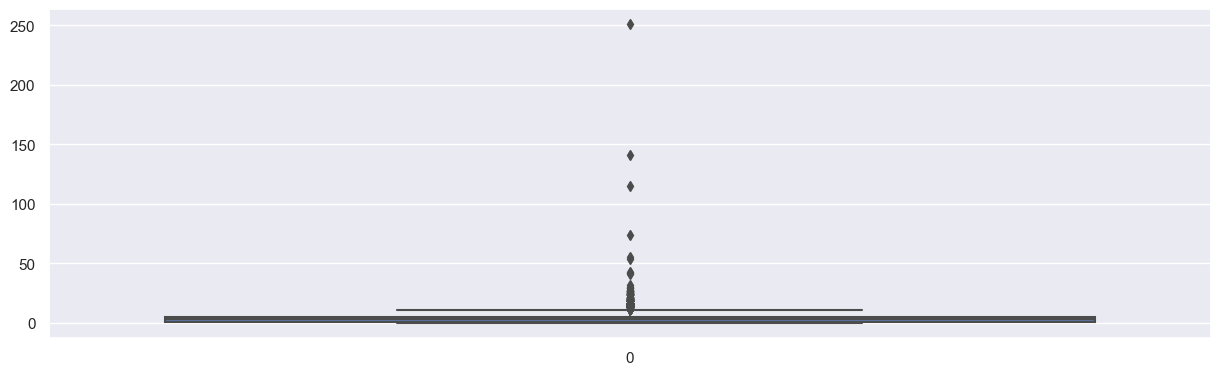

In [174]:
### outlier analysis using box plot
sns.boxplot(leads_data['TotalVisits'])

In [175]:
leads_data['TotalVisits'].describe() 

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [176]:
Q1 = leads_data['TotalVisits'].quantile(0.25)
Q3 = leads_data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
minvalue = (Q1 - 1.5 * IQR)
maxvalue = (Q3 + 1.5 * IQR)
print('minvalue',minvalue)
print('maxvalue',maxvalue)

minvalue -5.0
maxvalue 11.0


In [177]:
leads_data.shape

(9240, 23)

In [178]:
leads_data=leads_data[(leads_data['TotalVisits']>=-5) & (leads_data['TotalVisits']<=11)]

In [179]:
leads_data.shape

(8973, 23)

#### There is a discontinuity in box plot with sudden high rise of Page Views Per Visit

<Axes: >

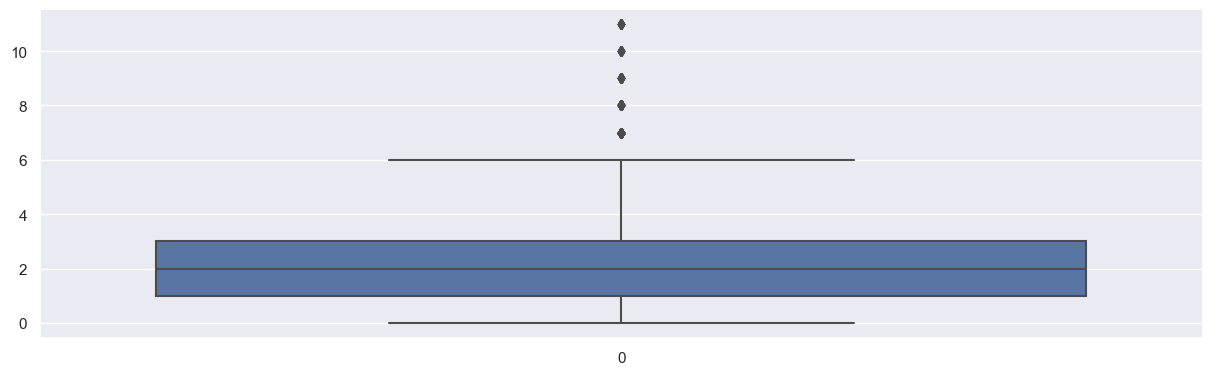

In [180]:
### outlier analysis using box plot
sns.boxplot(leads_data['Page Views Per Visit'])

In [181]:
leads_data['Page Views Per Visit'].describe() 

count    8973.000000
mean        2.271752
std         1.946753
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: Page Views Per Visit, dtype: float64

In [182]:
Q1 = leads_data['Page Views Per Visit'].quantile(0.25)
Q3 = leads_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
minvalue = (Q1 - 1.5 * IQR)
maxvalue = (Q3 + 1.5 * IQR)
print('minvalue',minvalue)
print('maxvalue',maxvalue)

minvalue -2.0
maxvalue 6.0


In [183]:
leads_data.shape

(8973, 23)

In [184]:
leads_data=leads_data[(leads_data['Page Views Per Visit']>=-2) & (leads_data['Page Views Per Visit']<=6)]

In [185]:
leads_data.shape

(8679, 23)

In [186]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

# <b>Step2 - Visualising data</b>

#### univariate analysis using barplot for categorical column

In [187]:
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted',  'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'
        ]

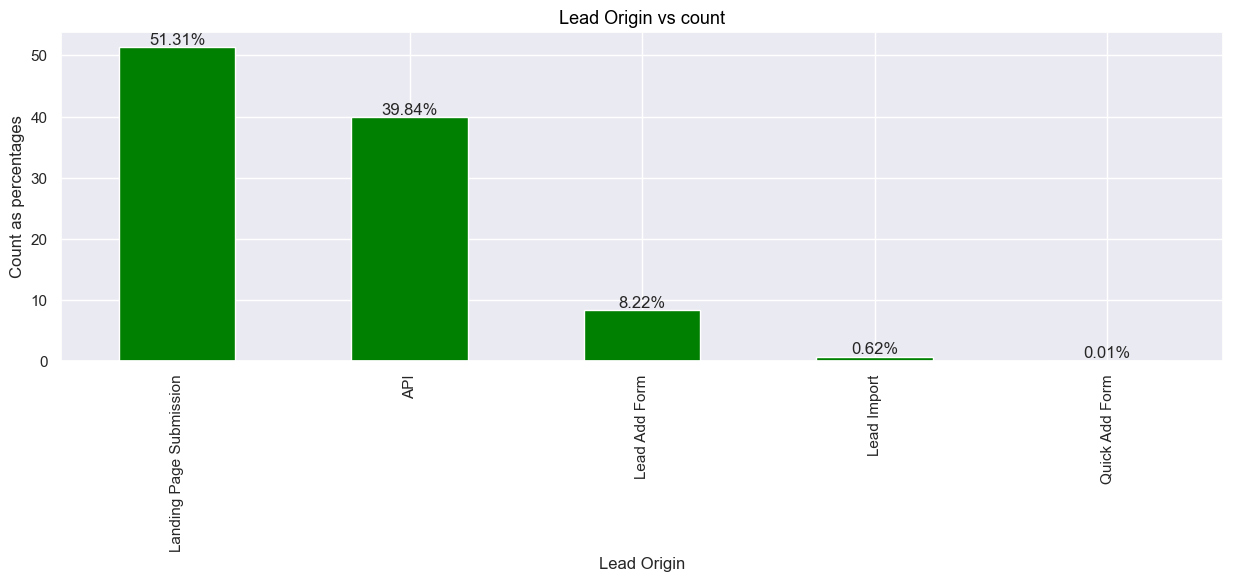

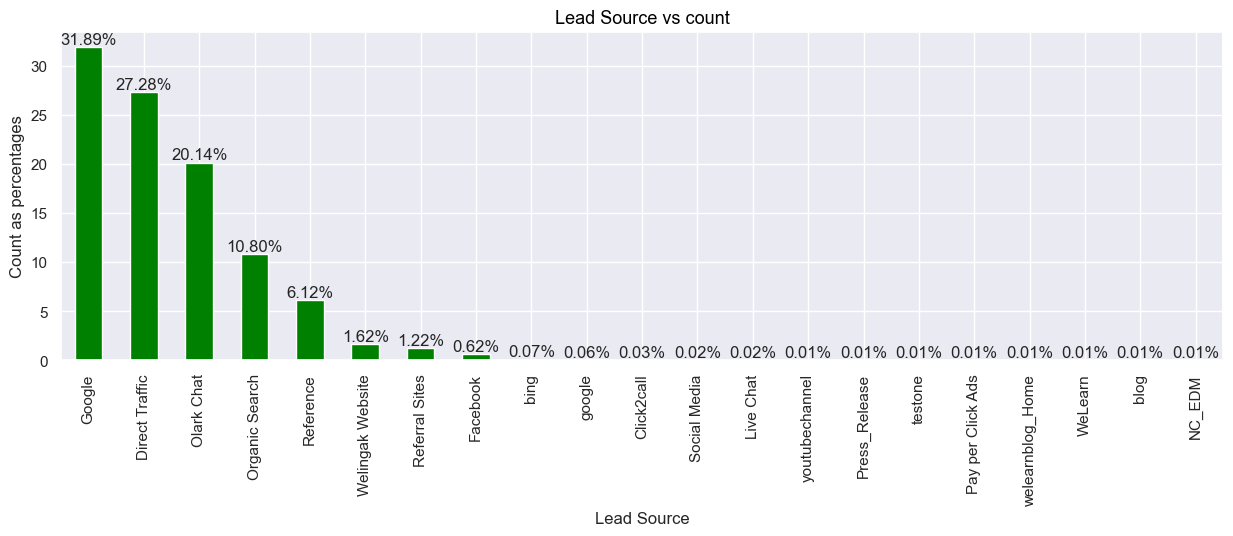

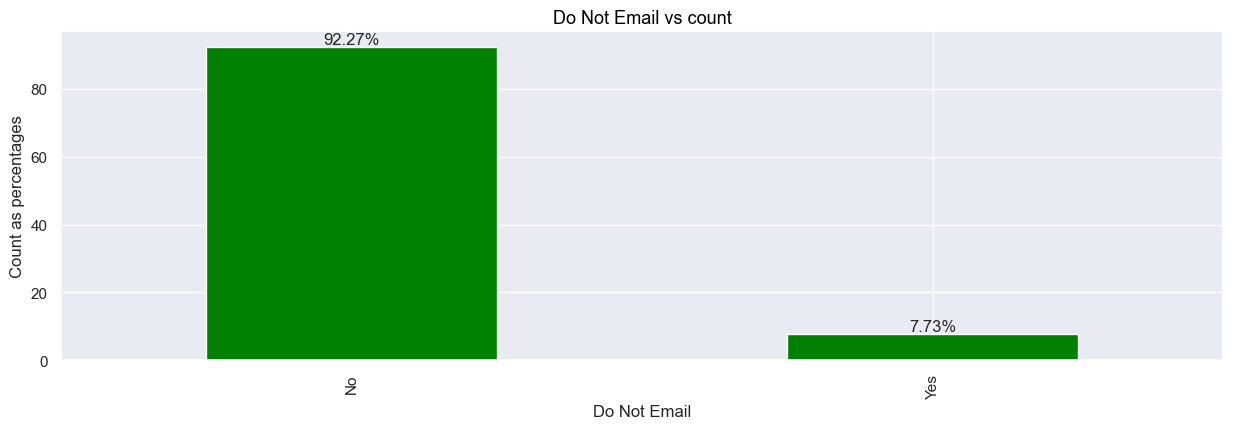

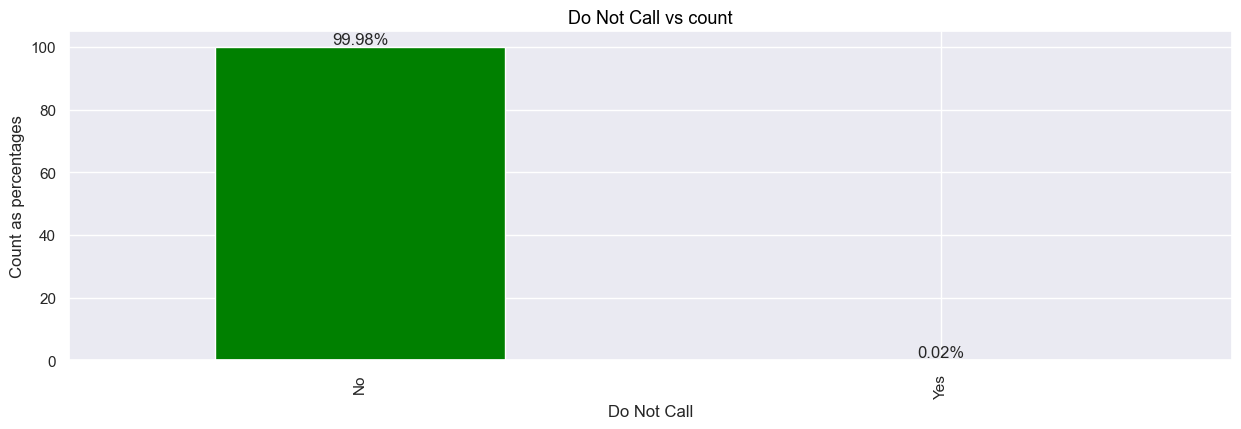

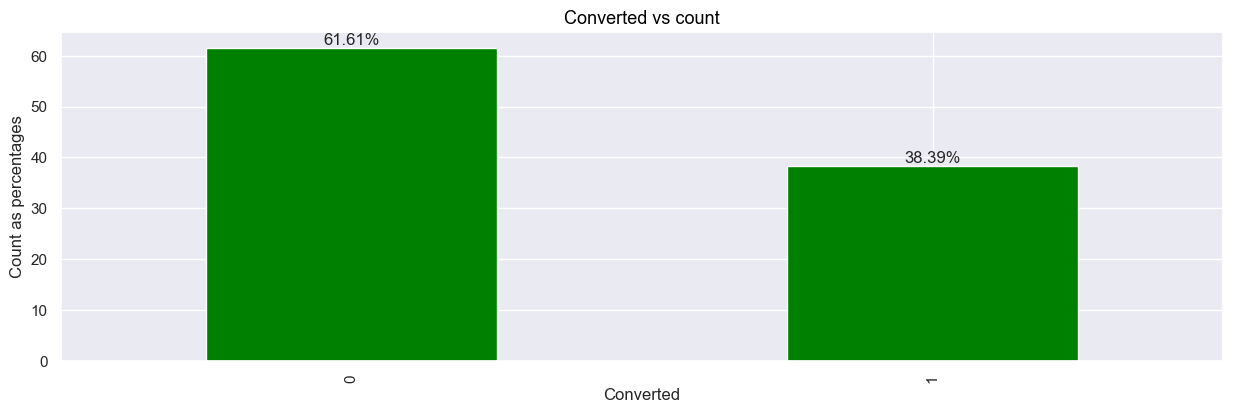

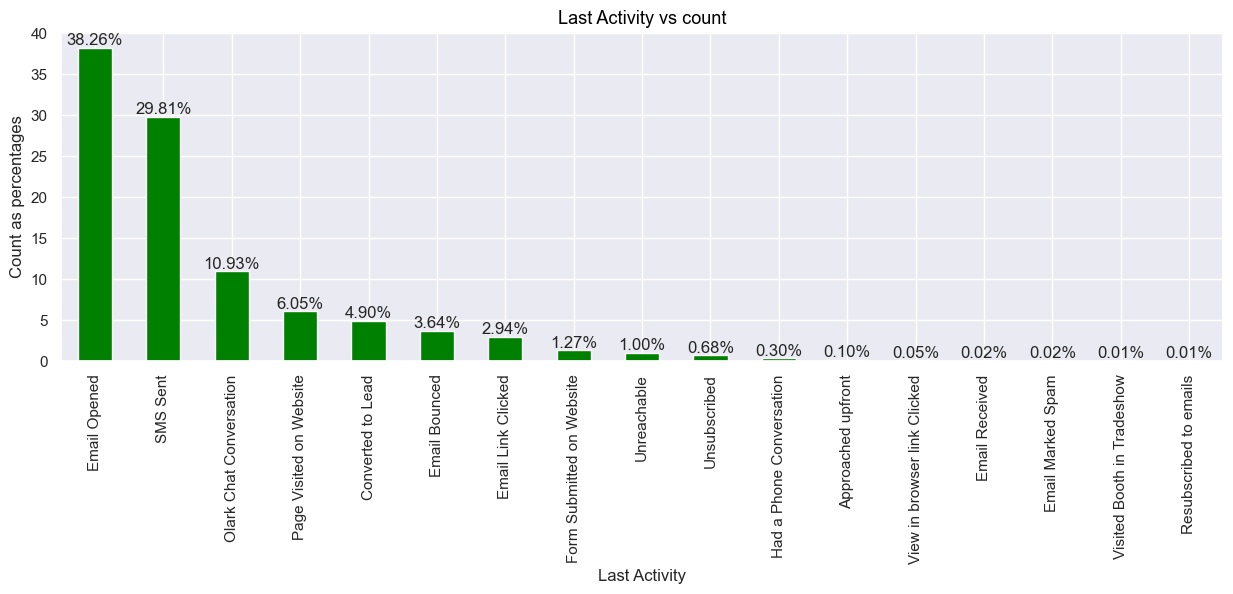

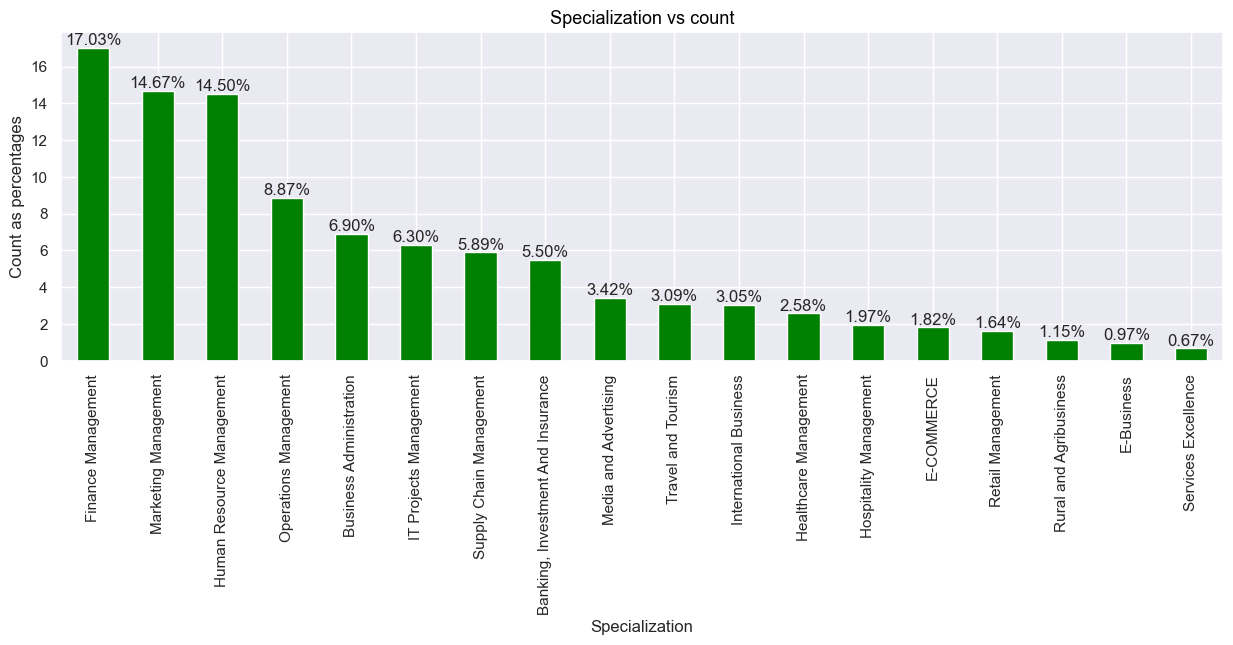

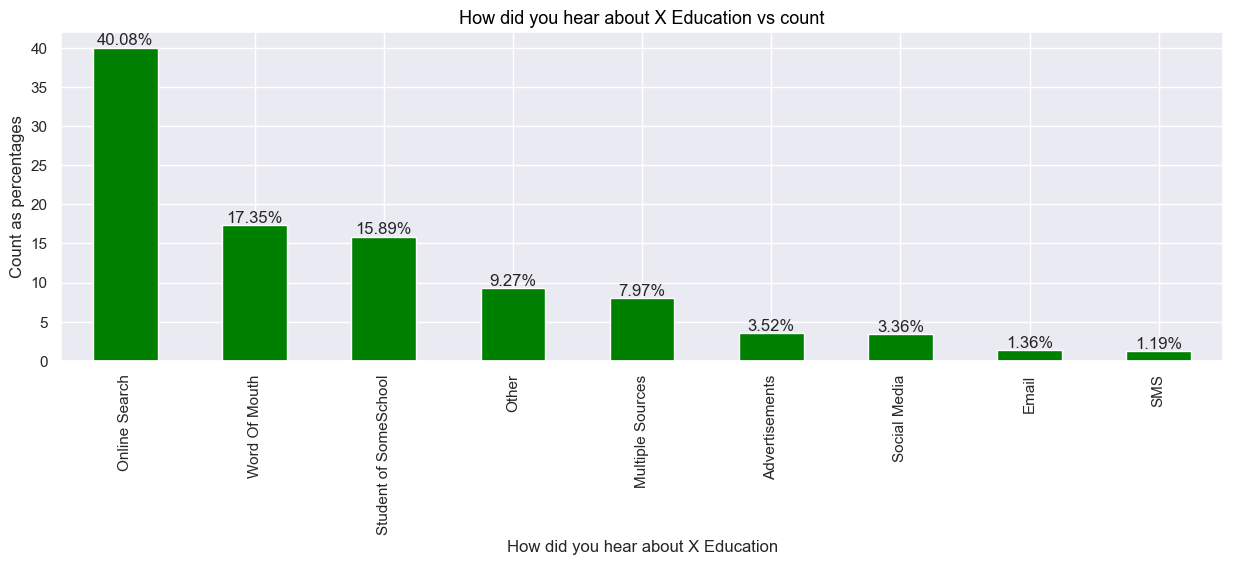

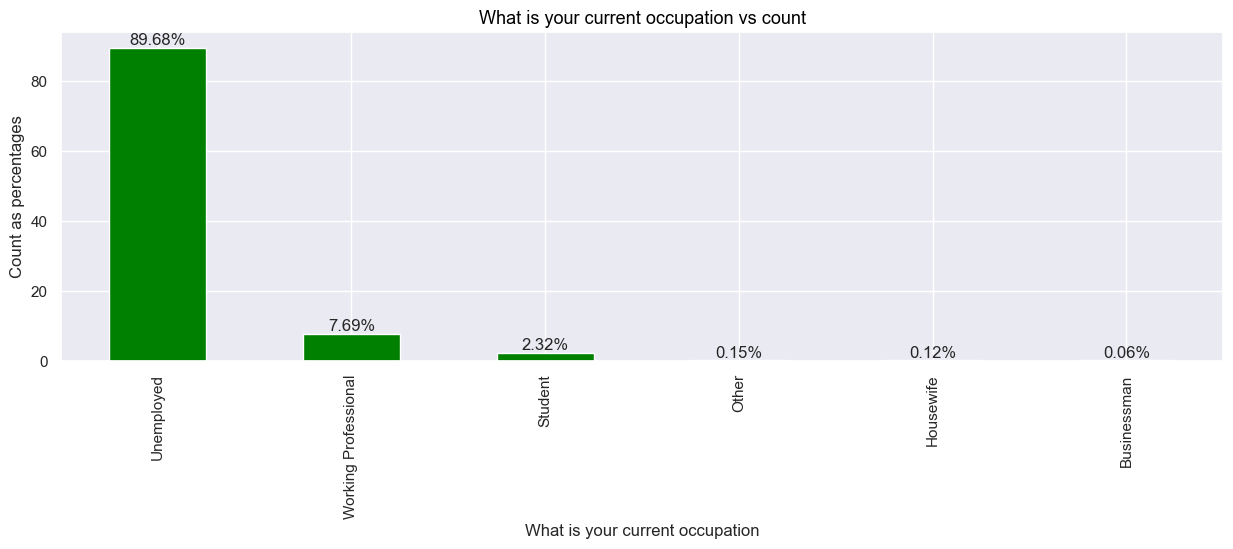

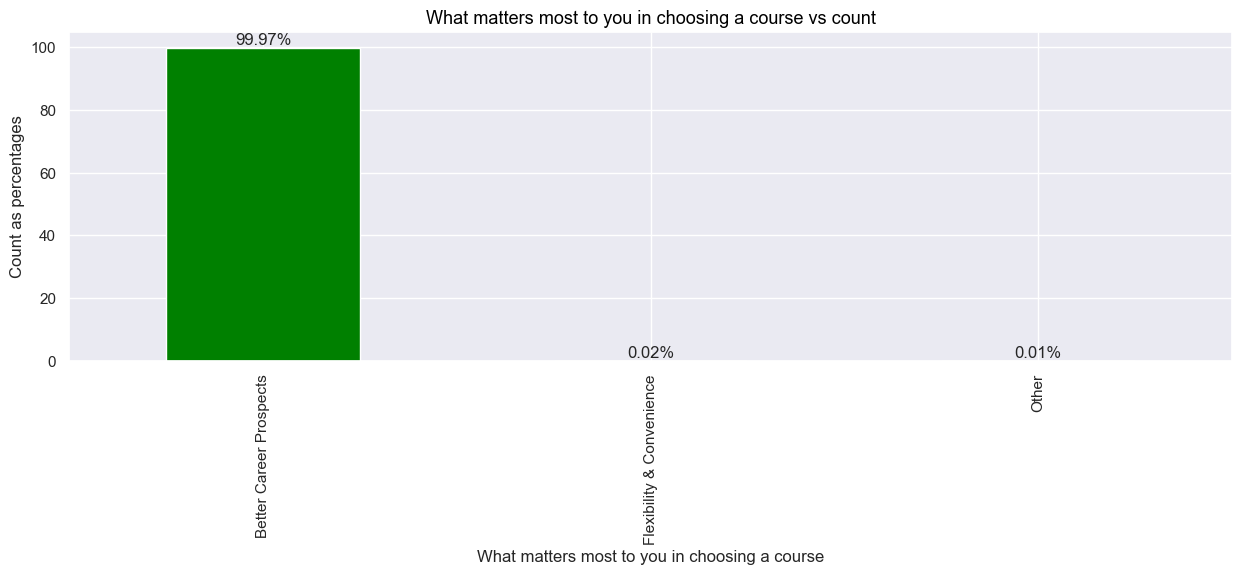

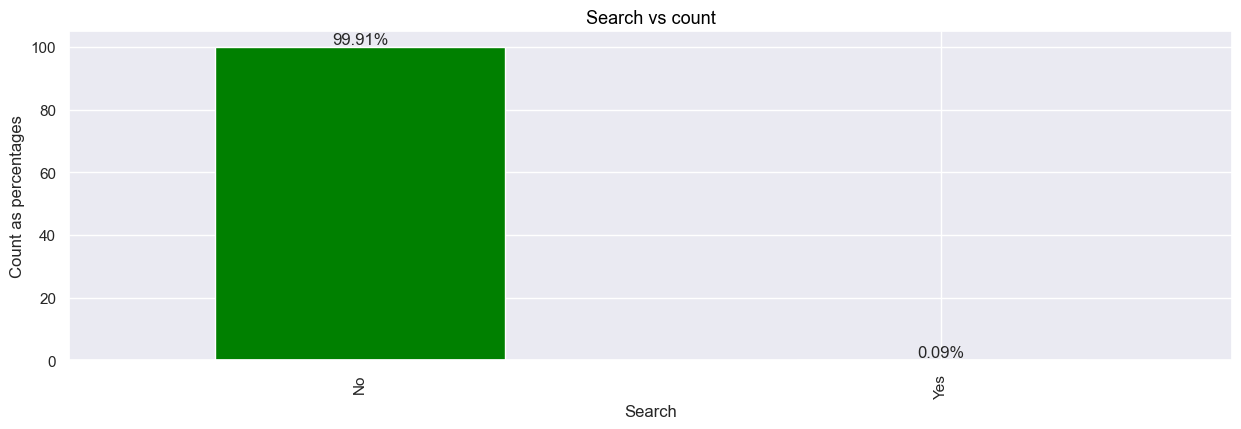

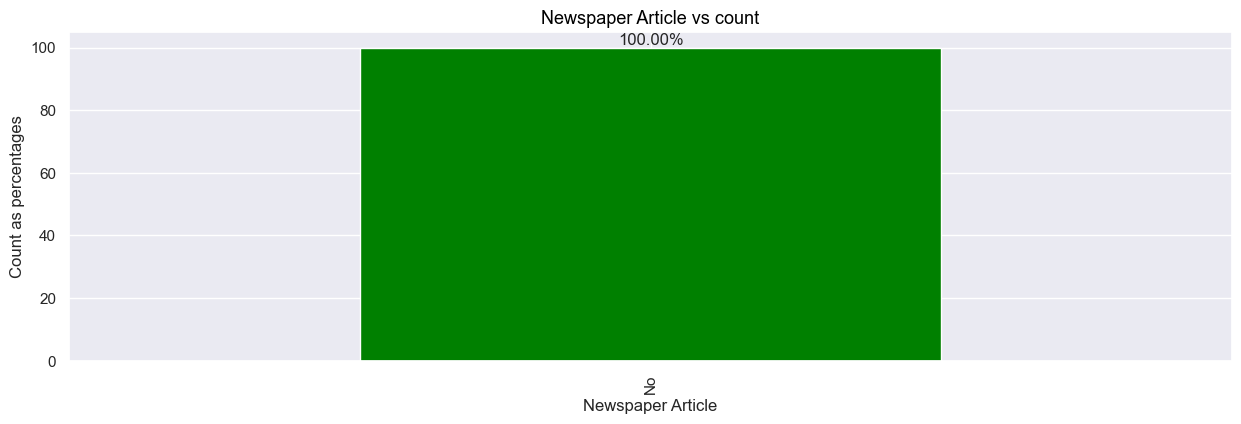

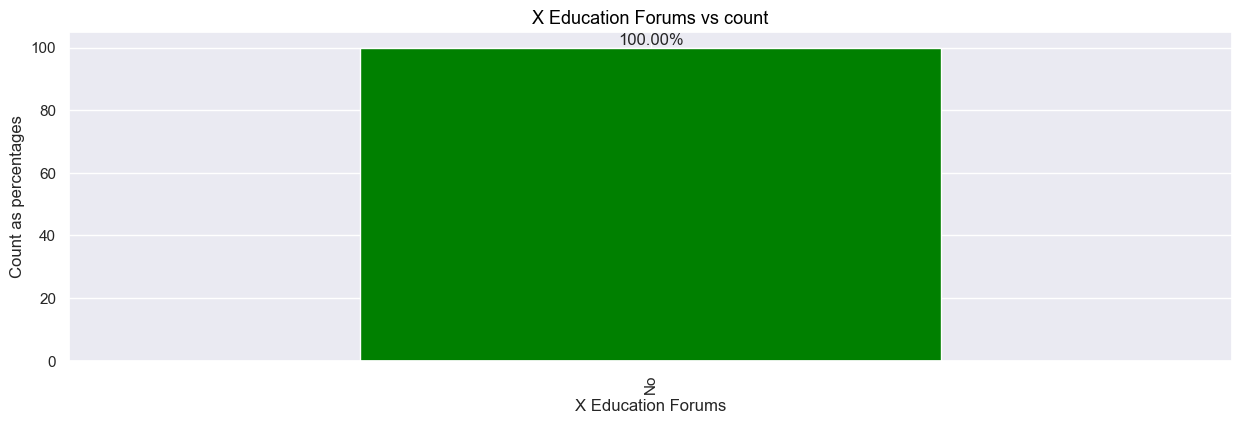

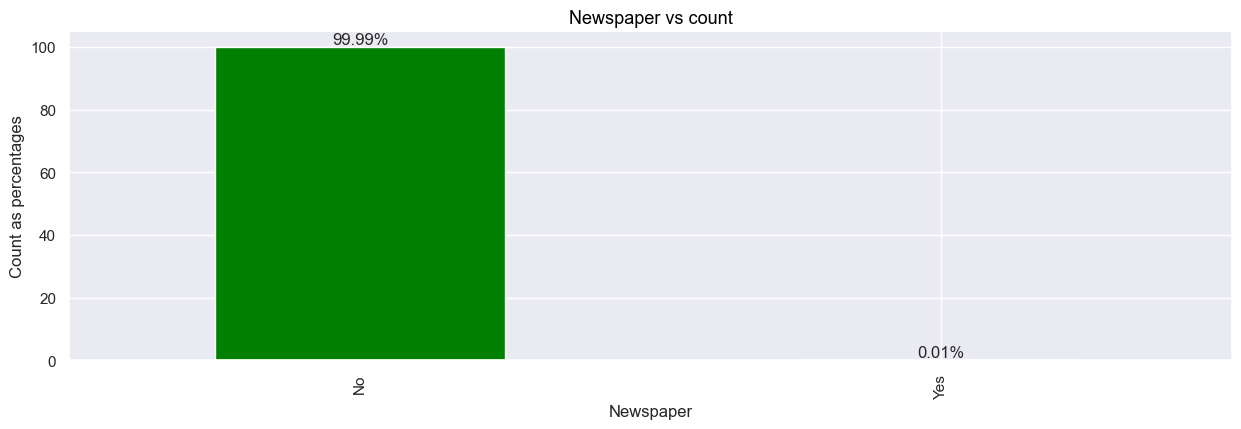

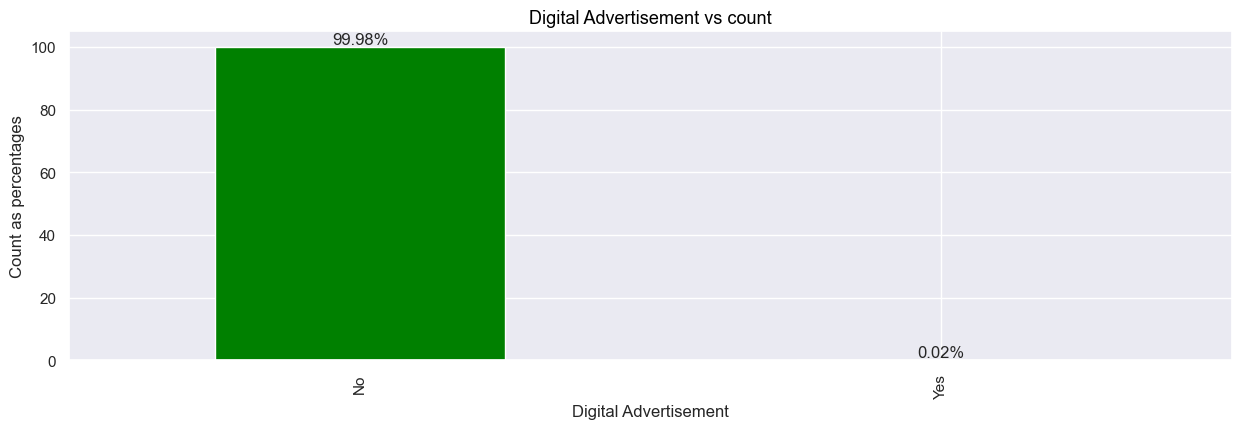

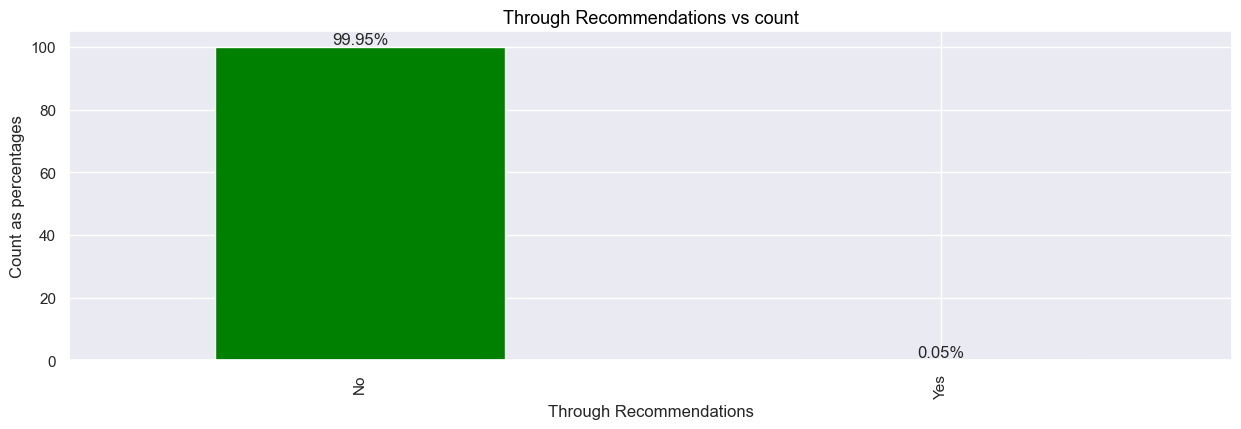

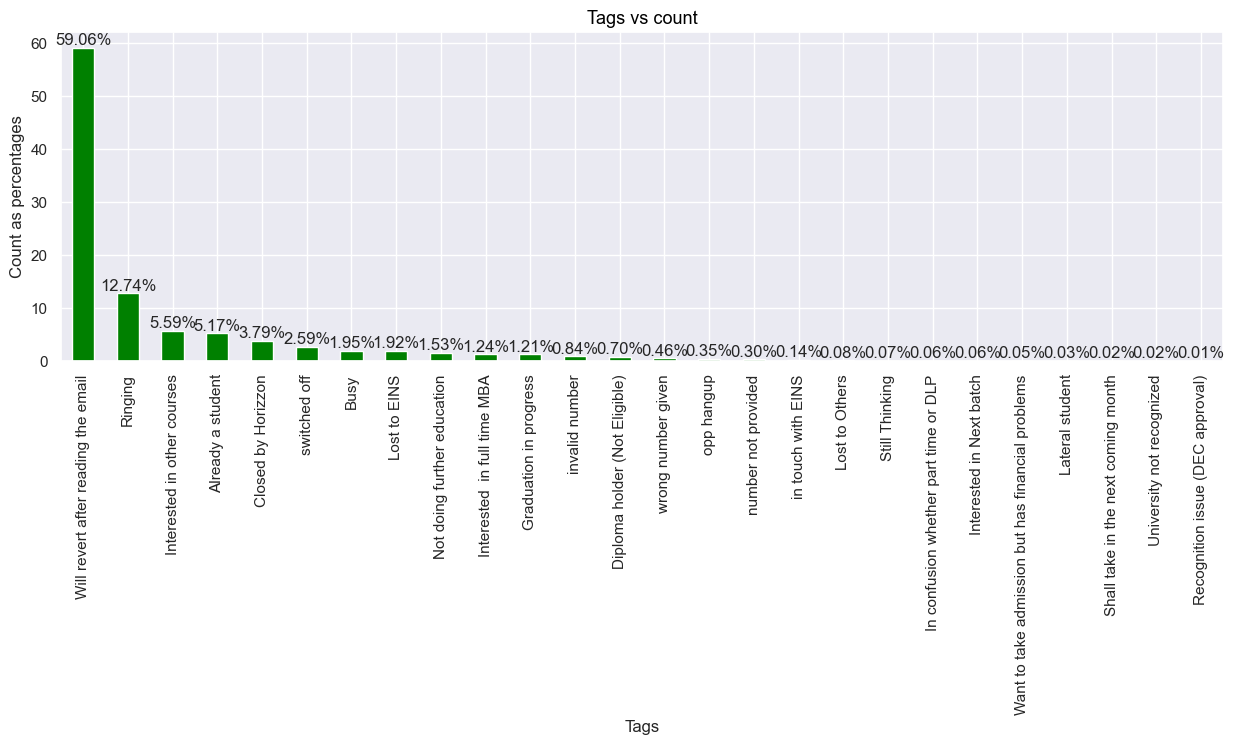

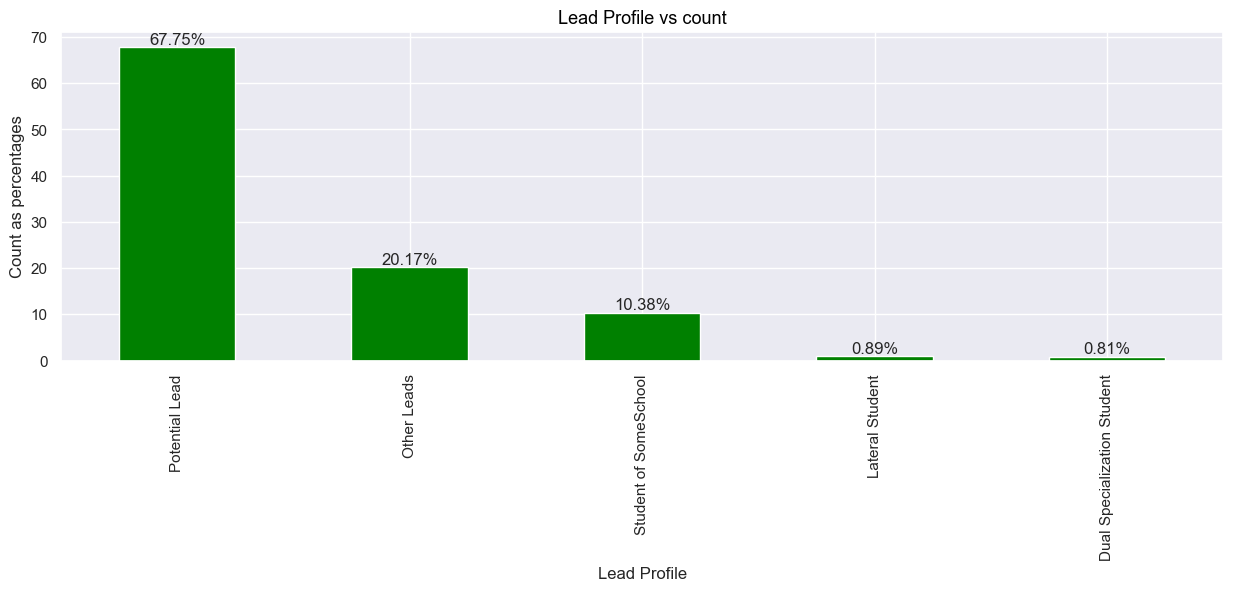

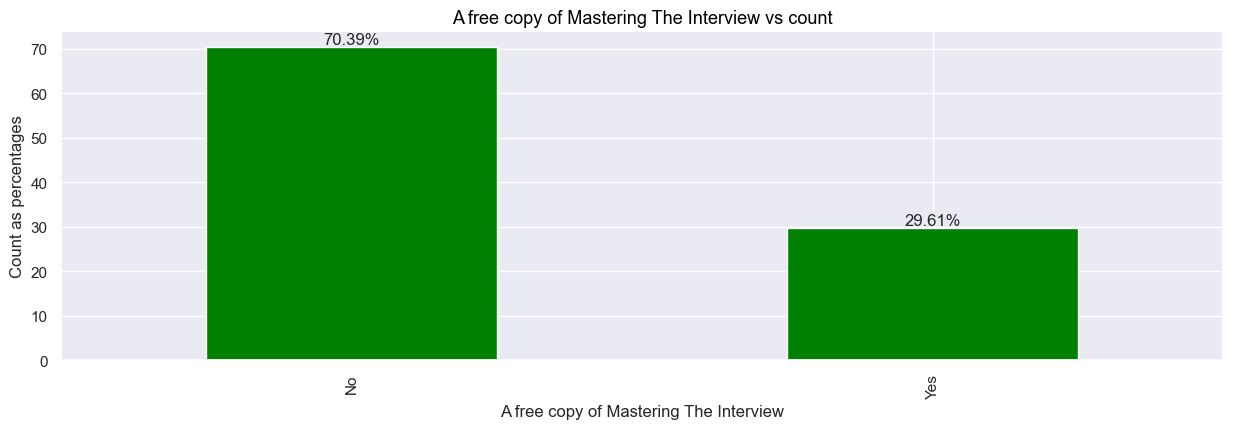

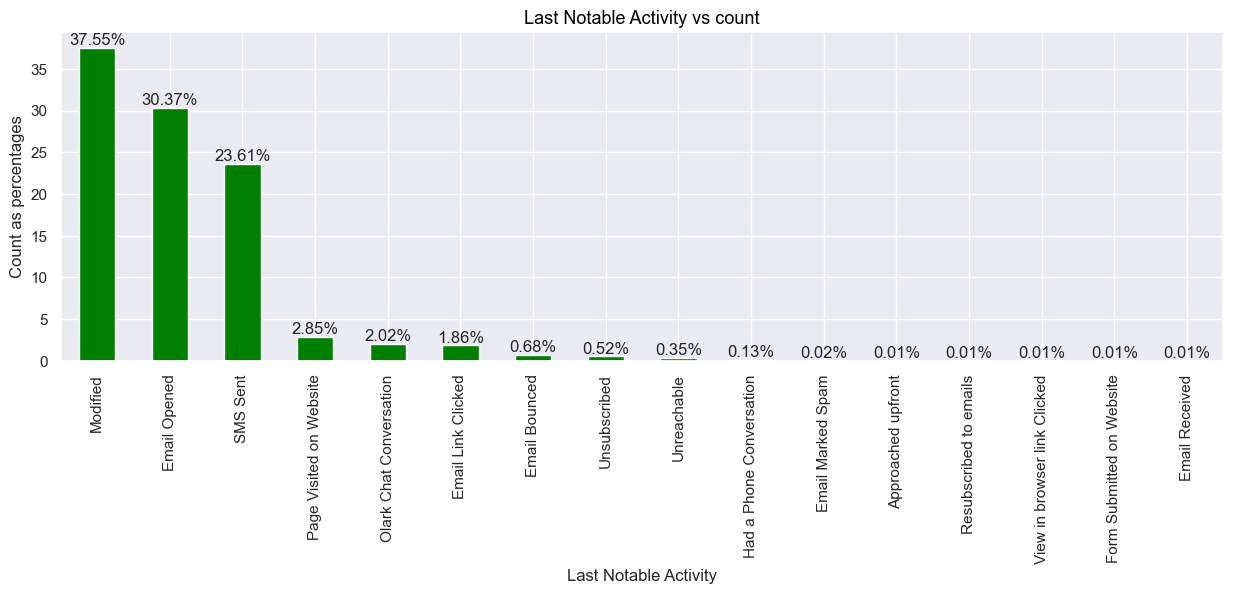

In [188]:
for i in cat_cols:
    ax=(leads_data[i].value_counts(normalize=True)*100).plot.bar(color='green') 
    ax.set_xlabel(i) 
    ax.set_ylabel("Count as percentages")
    title=i+" vs count"  
    plt.title(title,fontdict={'color':'black','fontsize':13})    
    for i in ax.containers:
        ax.bar_label(i,fmt='%.2f%%')
        
    plt.show()    

## <font color="blue"><b>Overall inference : categorical column </b></font>

#### <b> Lead origin : </b>

Landing Page Submission has highest count followed by API.

#### <b> Lead source : </b>

Most of the people came via Google followed by Direct Traffic source.

#### <b> Don't Email & Don't Call: </b>

Most of the people have choosen 
'Don't Email' - No option 
'Don't Call' - No option
from this dataset.

#### <b> Last activity: </b>

Email opened has highest count followed by SMS sent.


#### <b> Sepcialisation: </b>

People having management profession in any genre are more likely to be a lead.
Finance management has highest count followed by Marketing management, Human resource management.

#### <b> How did you hear about X Education: </b>

Online search has highest count followed by word of mouth, student of some school.

#### <b> what is your current occupation: </b>

Unemployed has highest count followed by working professional.

#### <b> What matters most to you in choosing a course: </b>

Better carrer prospects has the highest count.

#### <b> Tags </b>

Will revert after reading the email has highest count followed by Ringing.

#### <b> Lead profile </b>

Potential lead has highest count followed by other leads and student of some school.

#### <b> Last notable activity </b>

Modified has highest count followed by email opened and sms sent.

#### univariate analysis using histogram for continuous column

[ 0.   1.1  2.2  3.3  4.4  5.5  6.6  7.7  8.8  9.9 11. ]


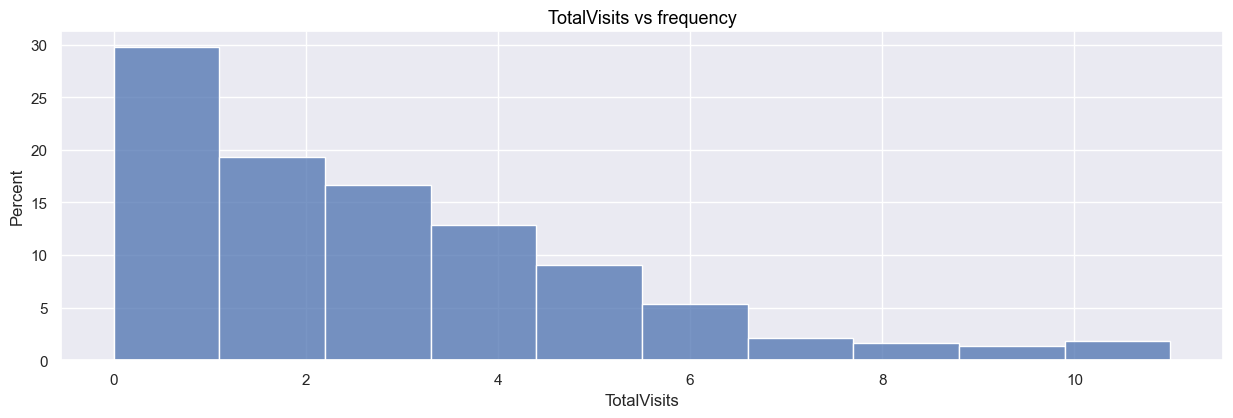

[   0.   227.2  454.4  681.6  908.8 1136.  1363.2 1590.4 1817.6 2044.8
 2272. ]


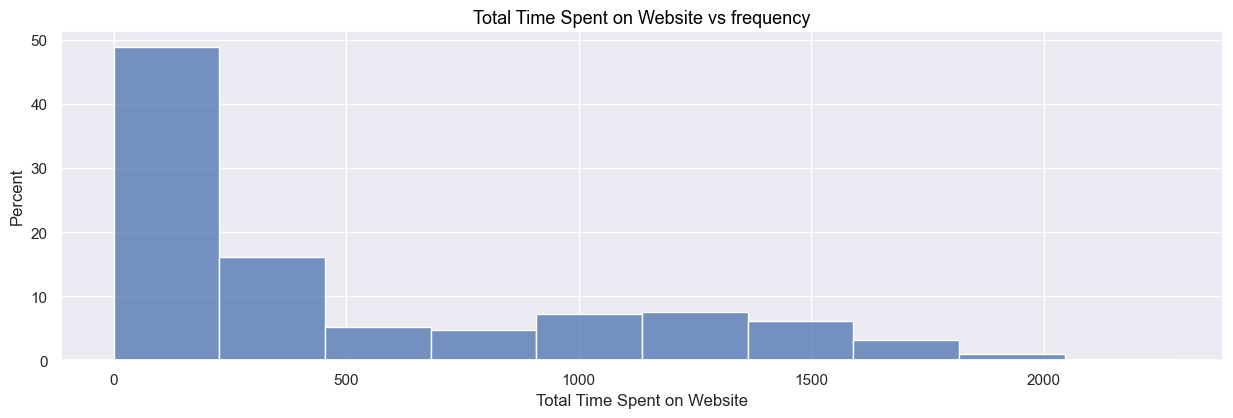

[0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4 6. ]


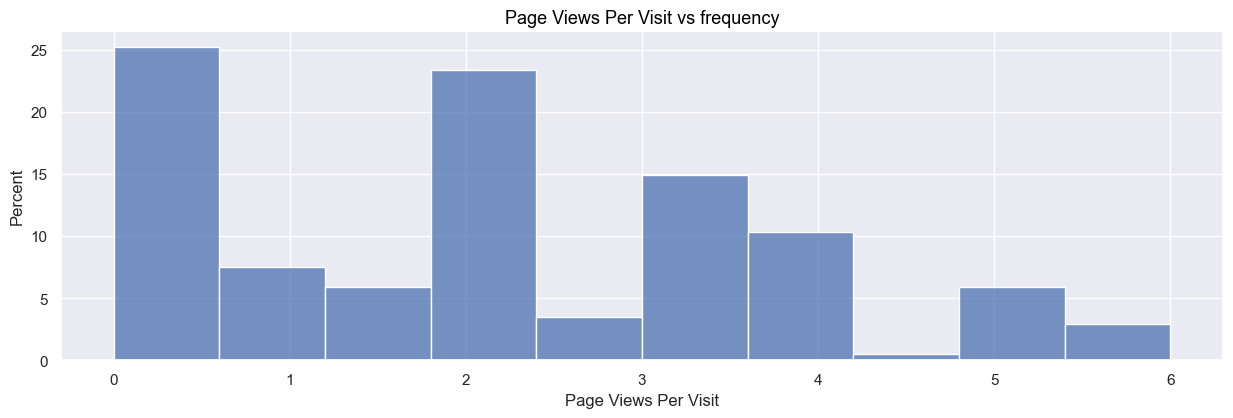

In [189]:
num_cols=['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
for i in num_cols:
    sns.histplot(leads_data[i],stat='percent',bins=10)
    title=i+" vs frequency"  
    bins = np.histogram_bin_edges(leads_data[i], bins=10)
    # Print the bin edges
    print(bins)
    plt.title(title,fontdict={'color':'black','fontsize':13}) 
    plt.show()

## <font color="blue"><b>Overall inference : numerical column </b></font>

#### <b>Total visits</b>

Total visits is the highest in frequncy 0 to 1 bucket followed by 1 to 2 bucket.

#### <b> Total Time Spent on Website</b>

Total Time Spent on Website is the highest in  frequncy 0 to 227 bucket followed by 227 to 454 bucket.

#### <b> Page Views Per Visit</b>

Page Views Per Visit is the highest in frequency 0 to 0.6 bucket followed by 1.8 to 2.4 bucket.

### Bivariate analysis w.r.t Target variable (categorical column vs categorical column)

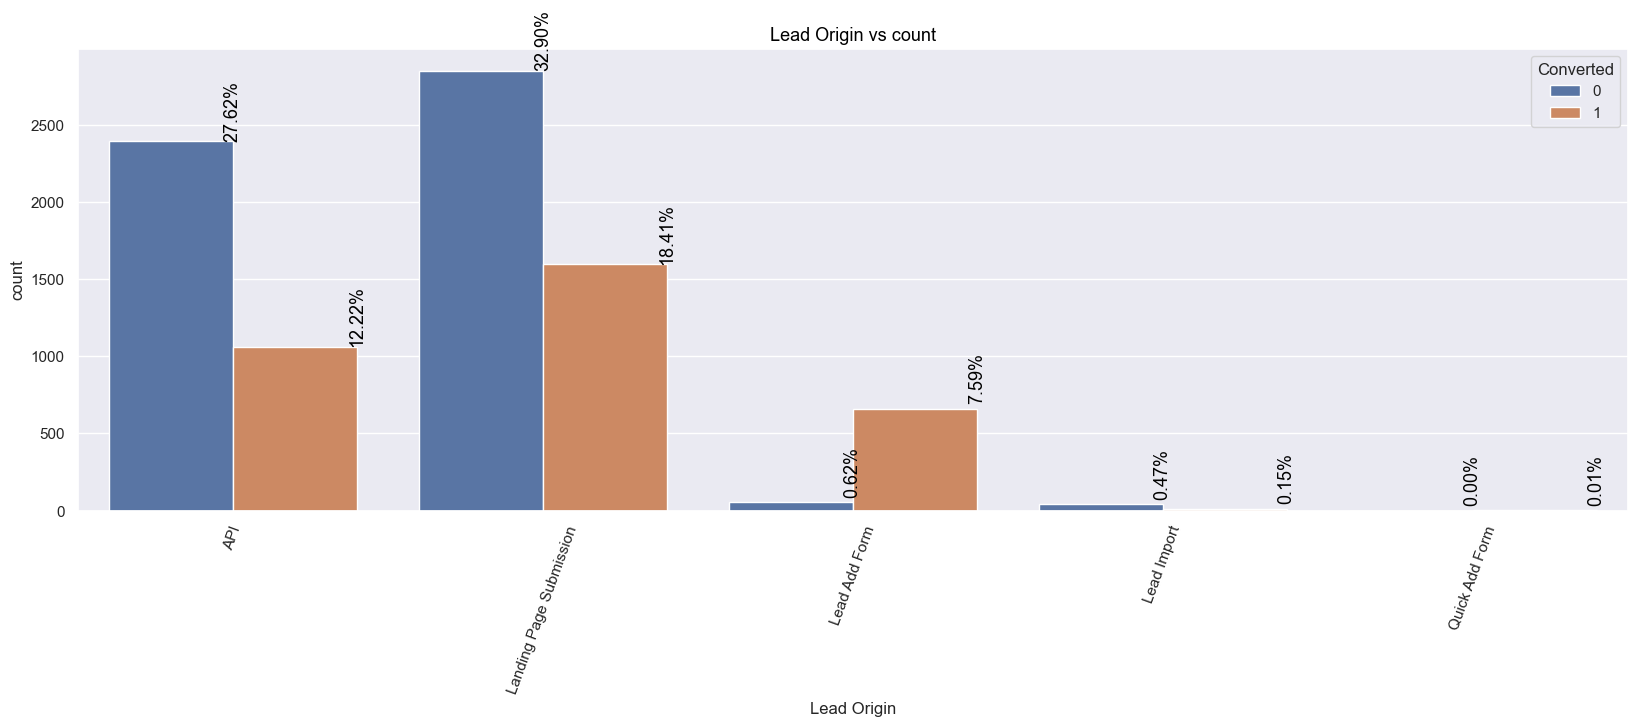

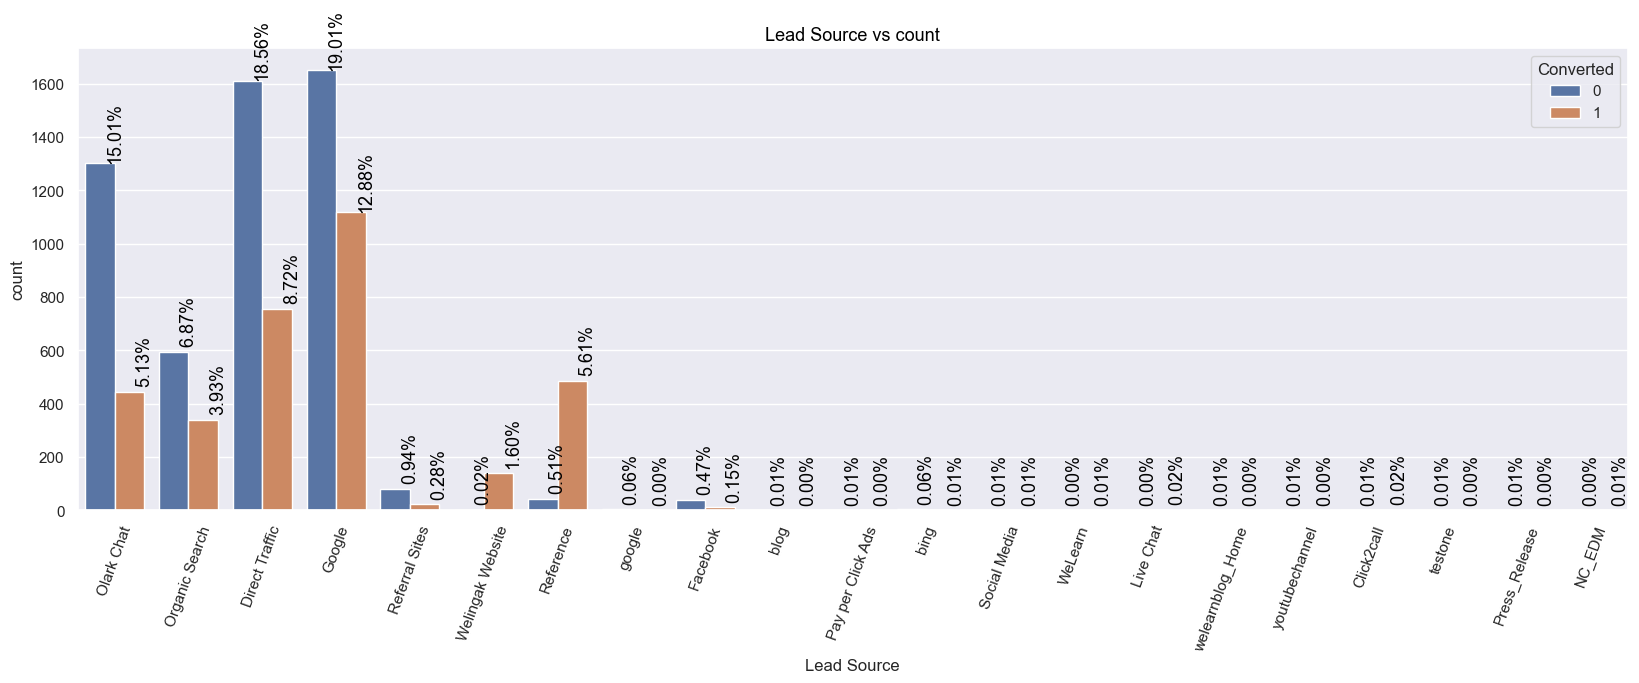

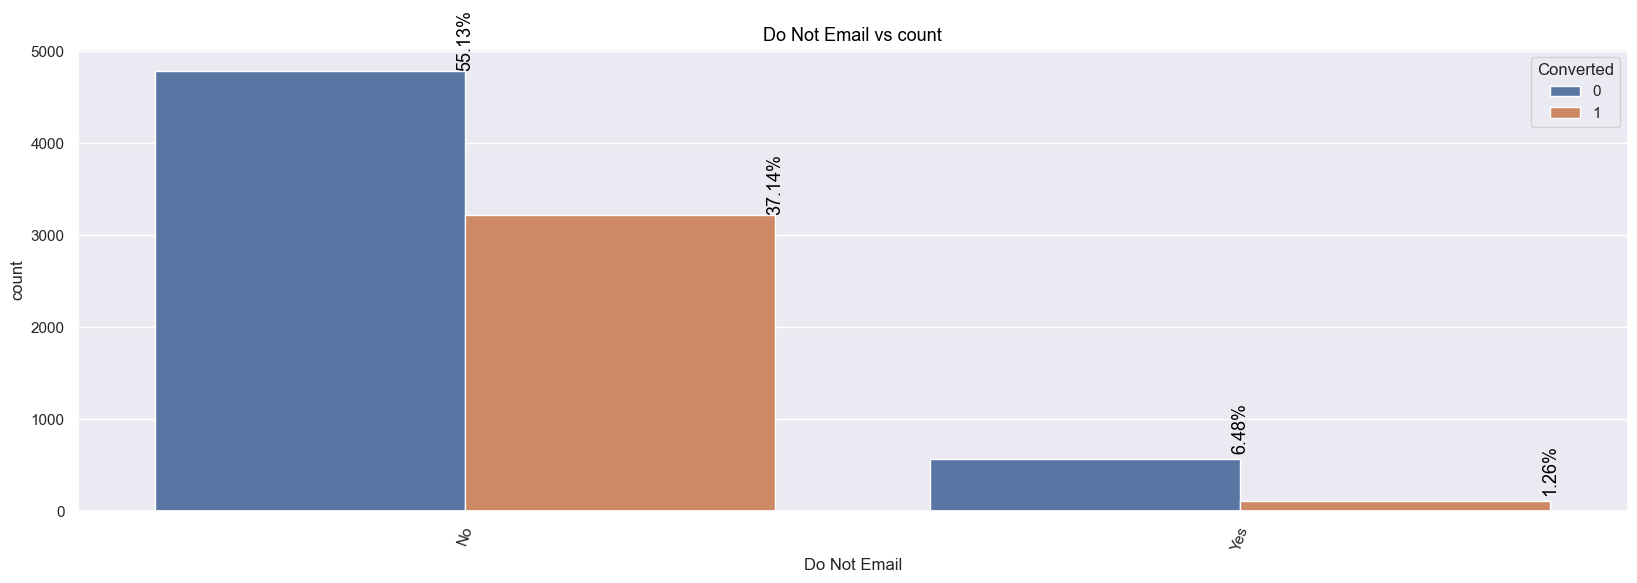

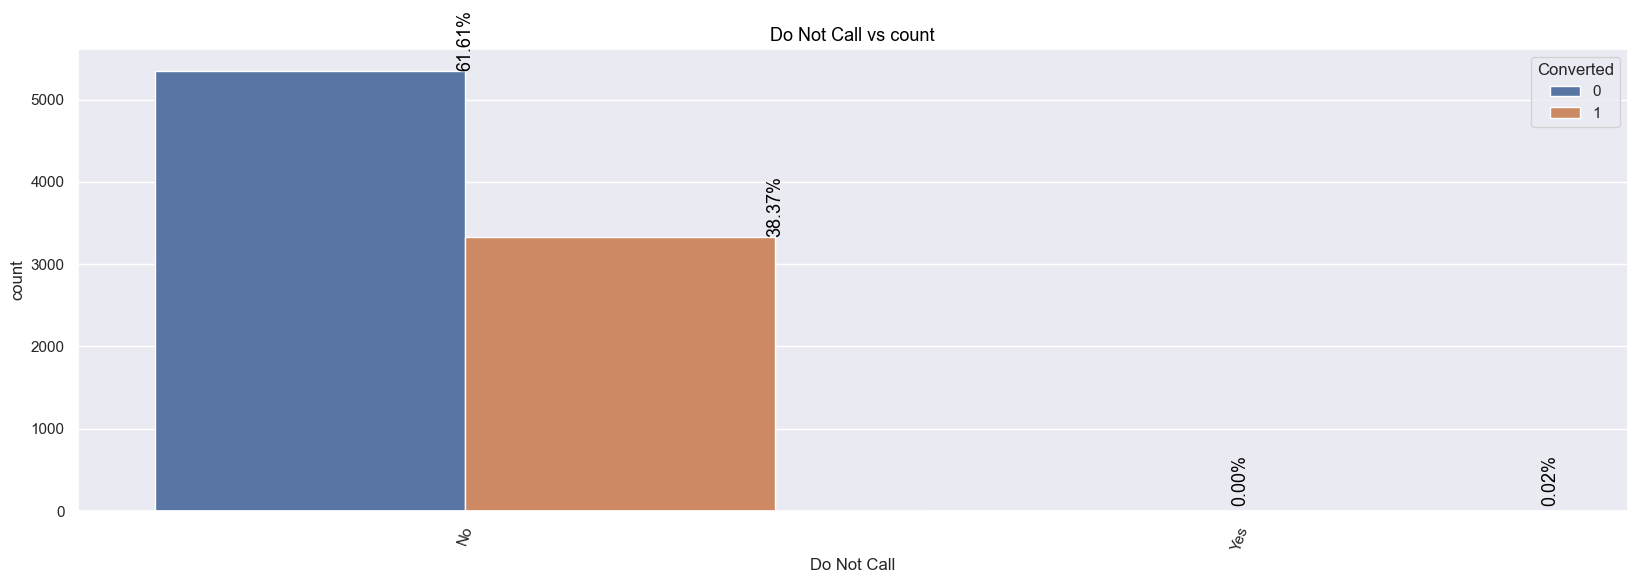

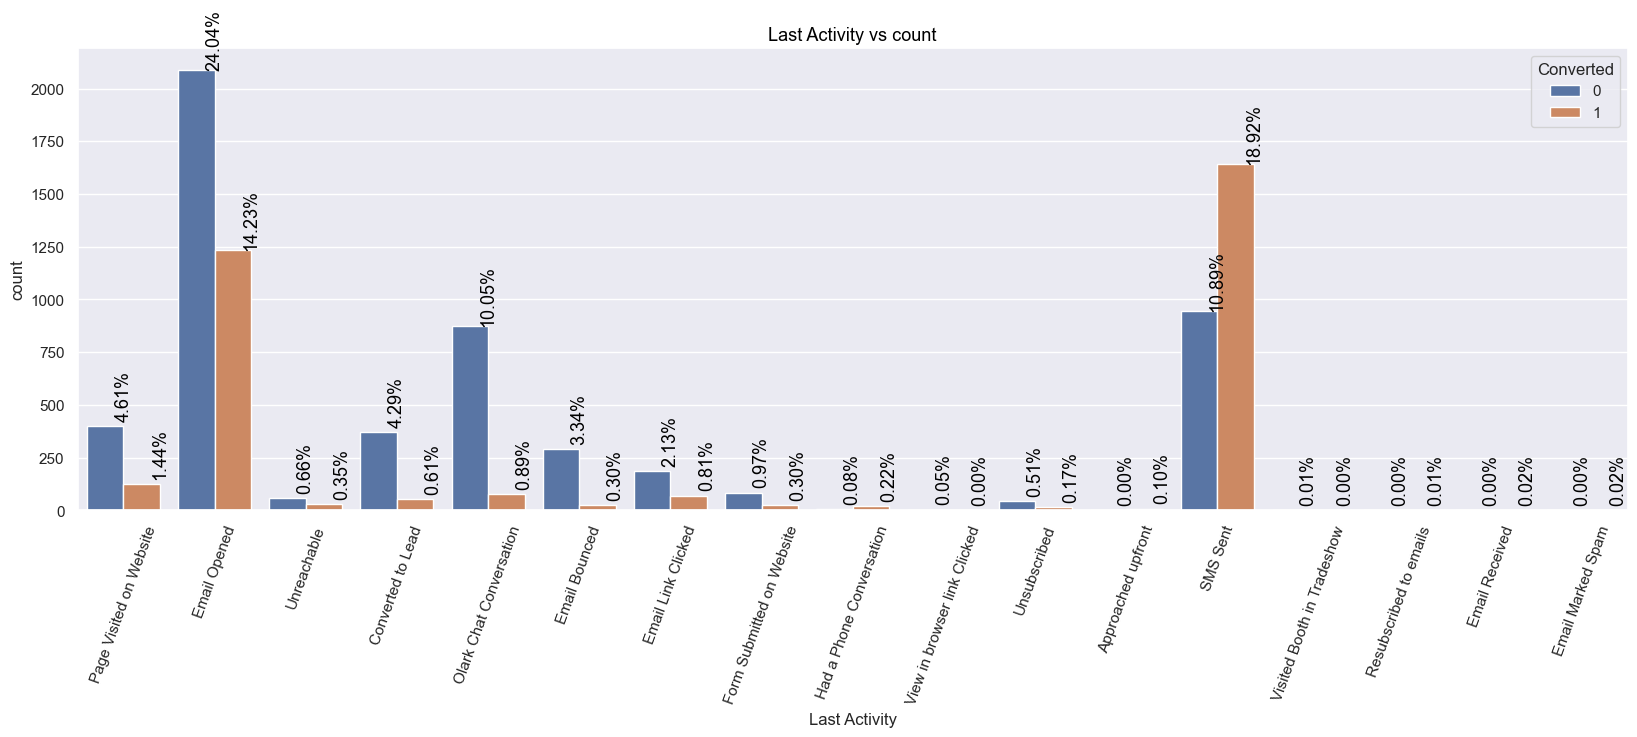

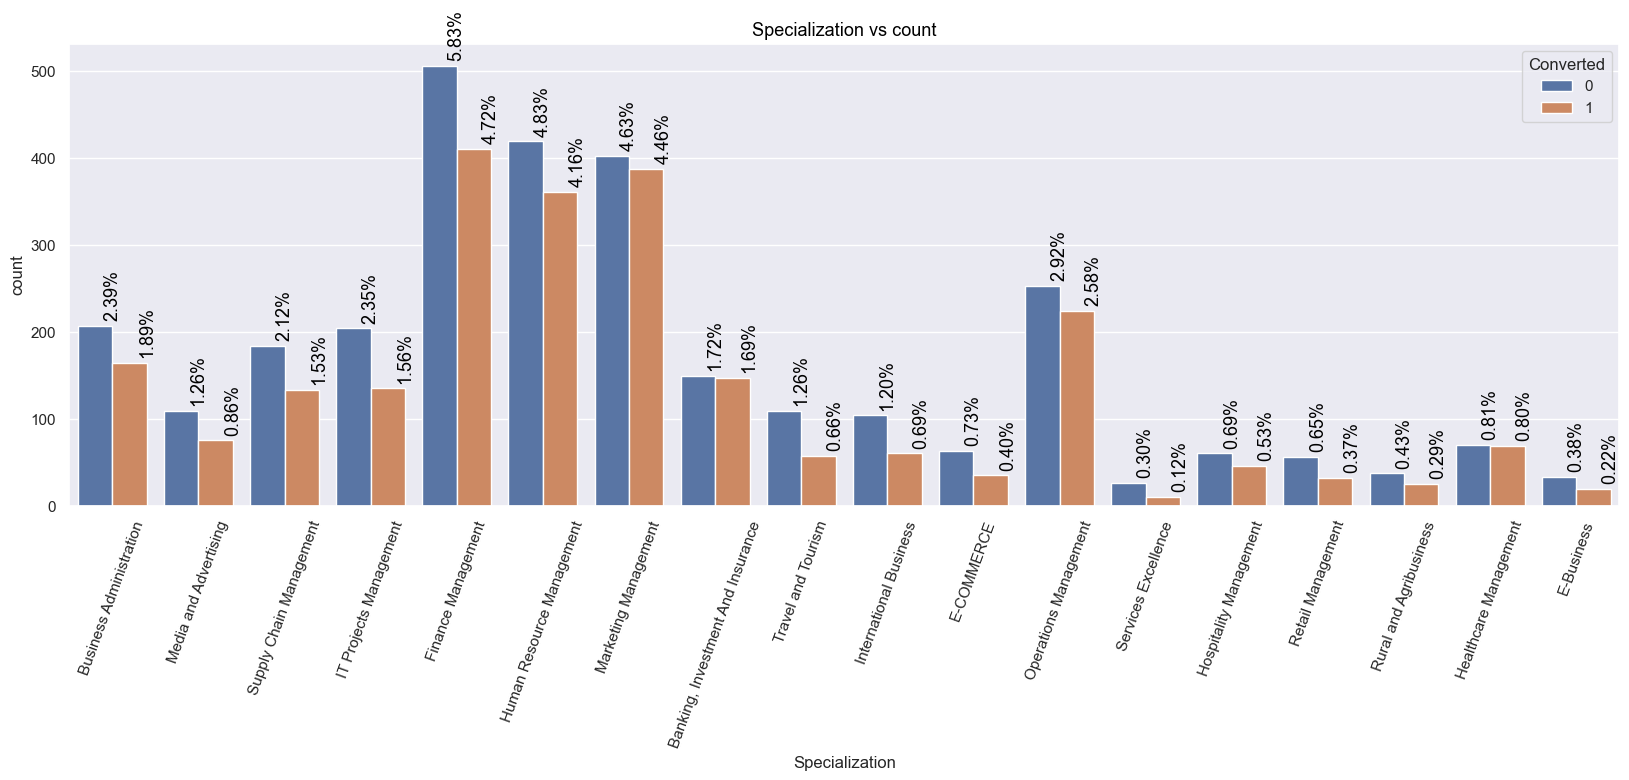

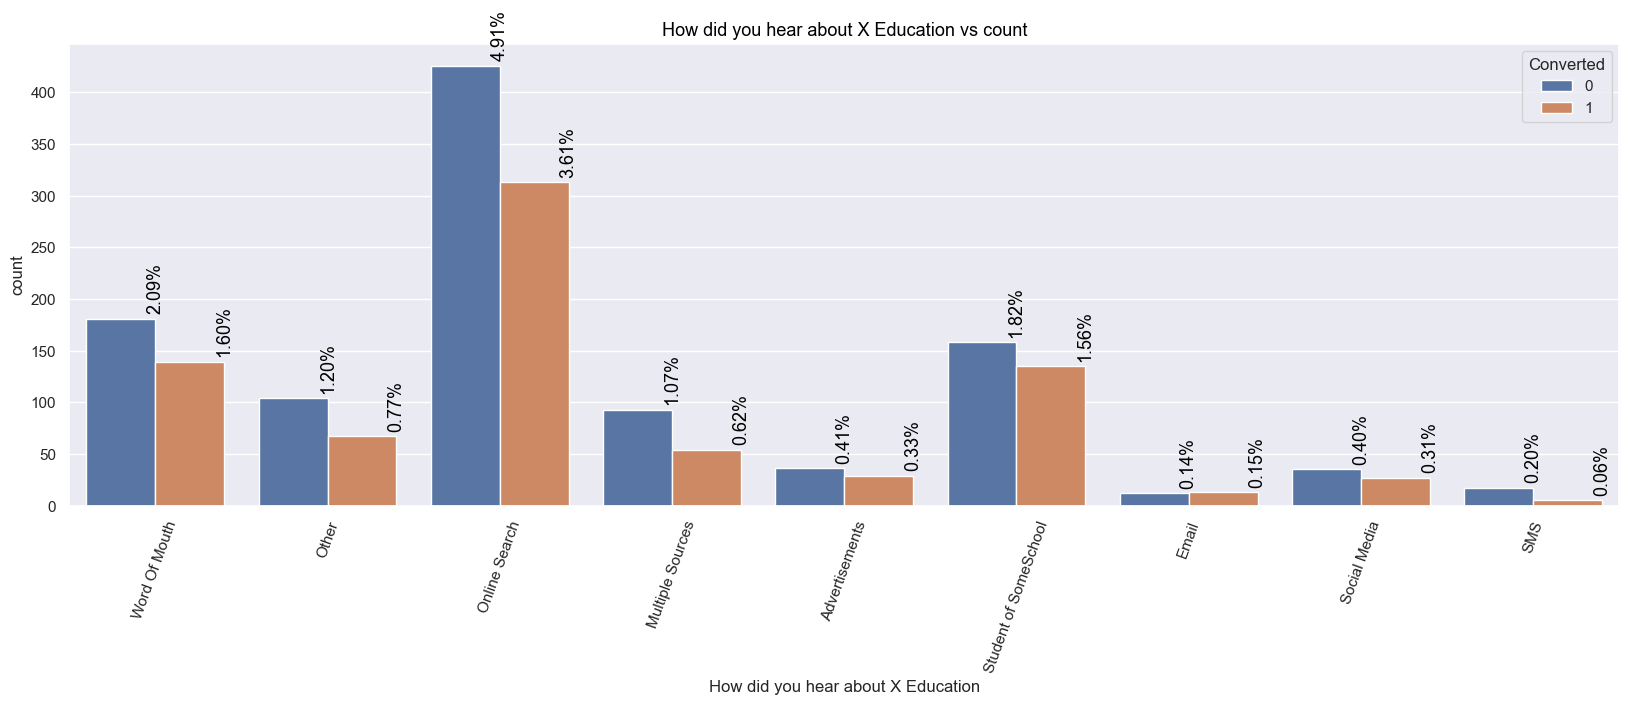

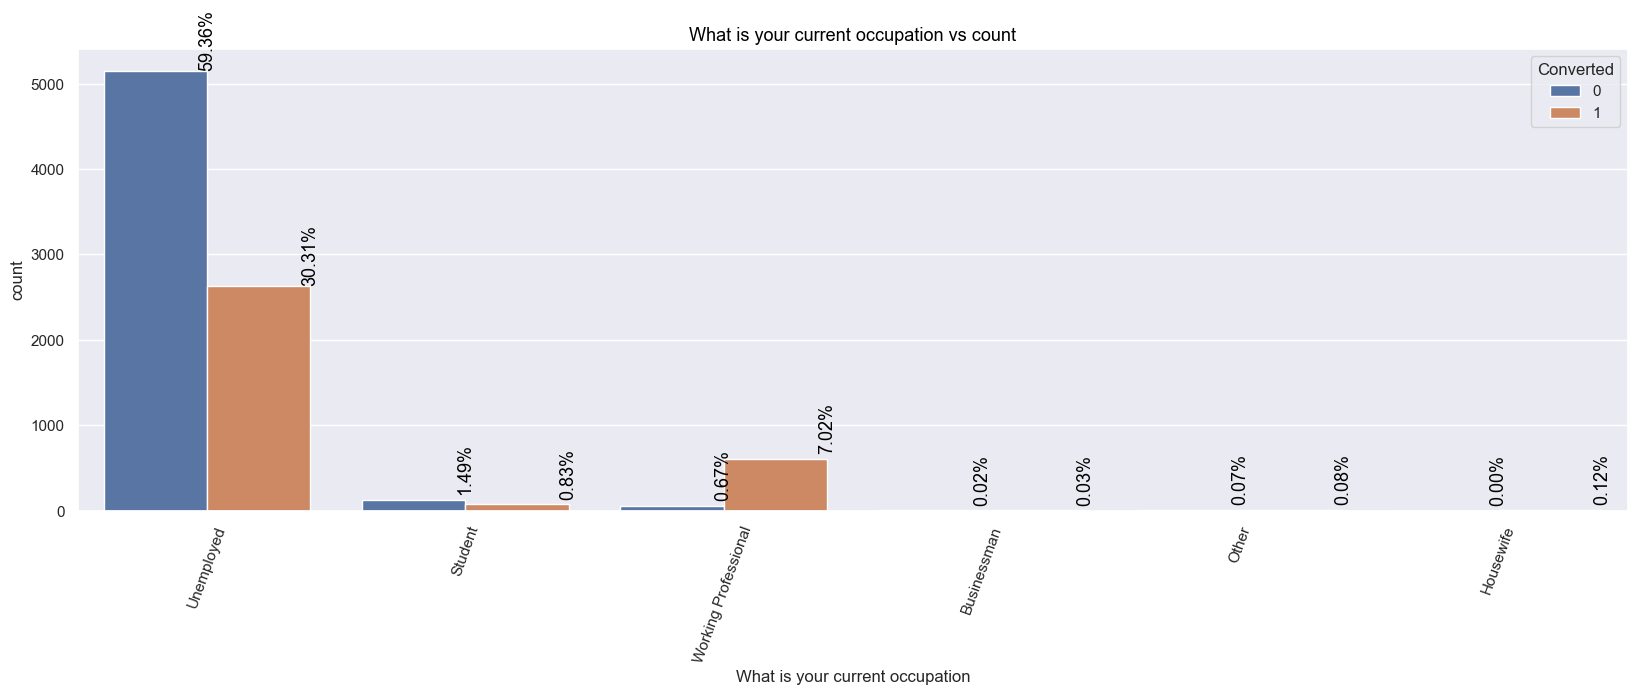

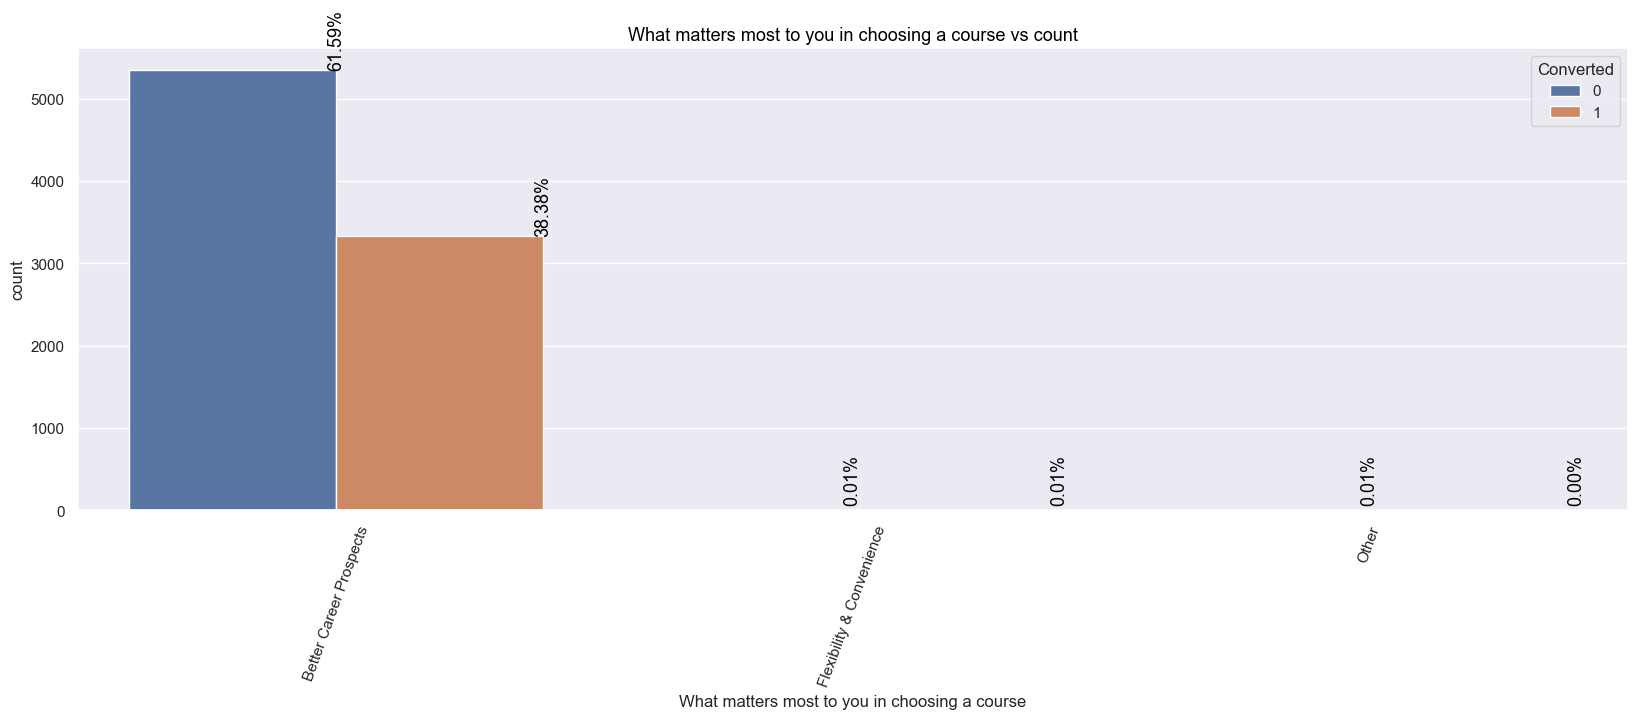

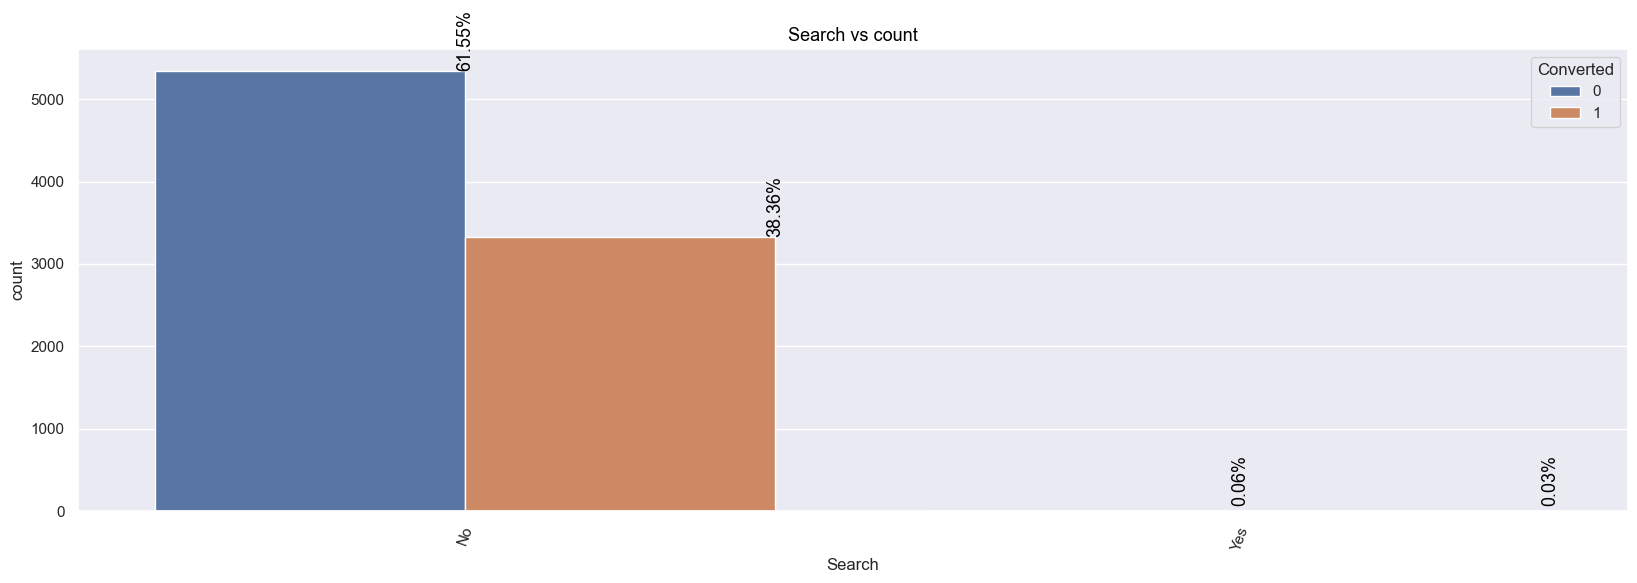

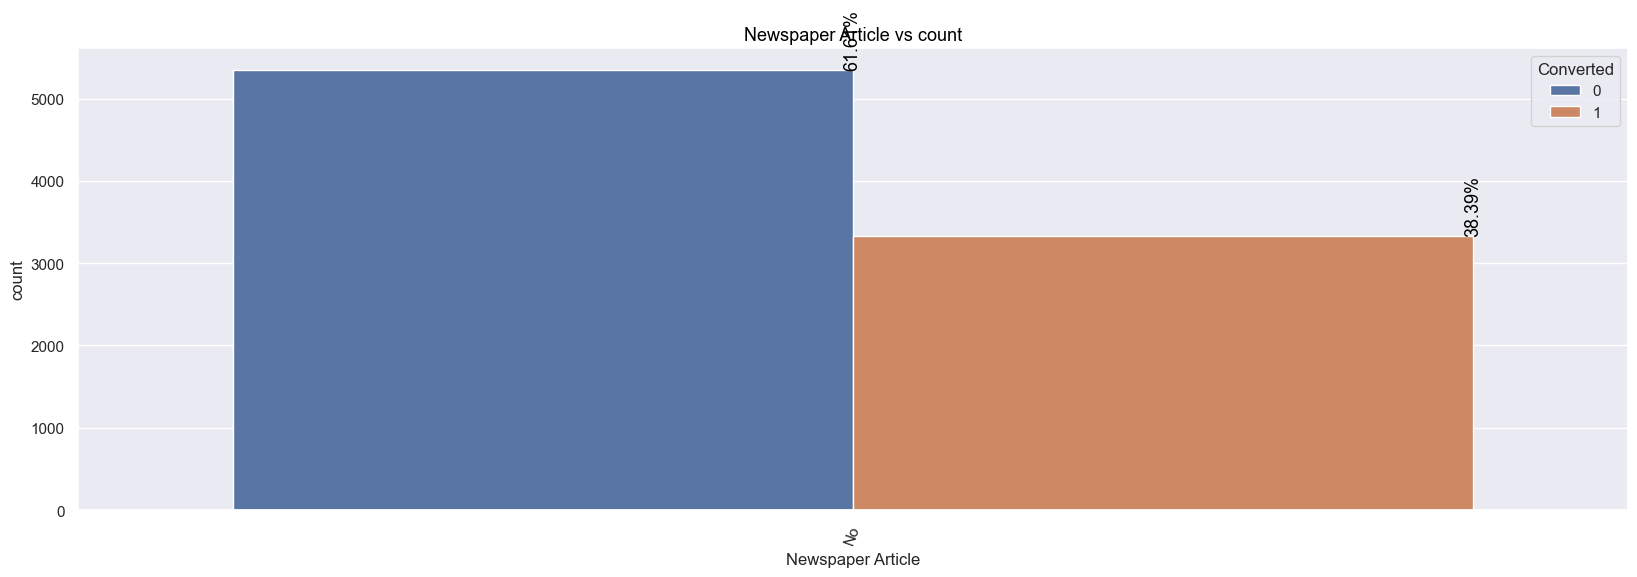

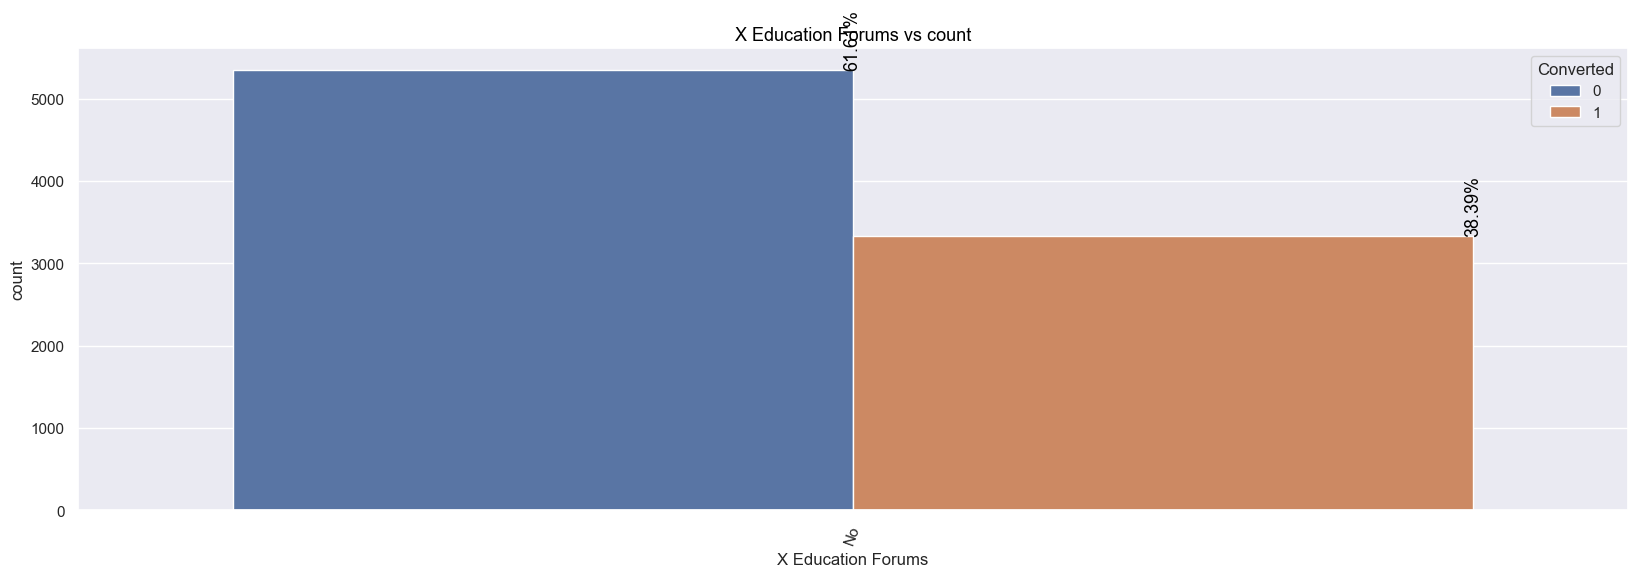

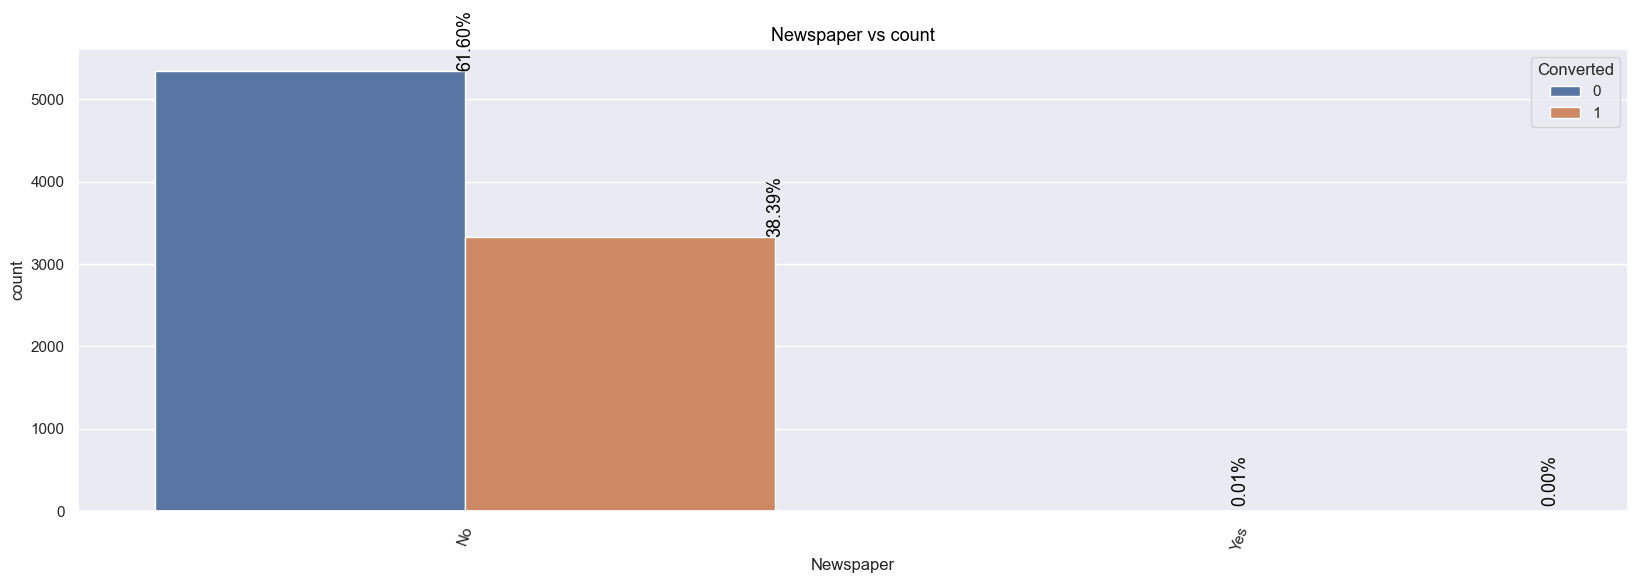

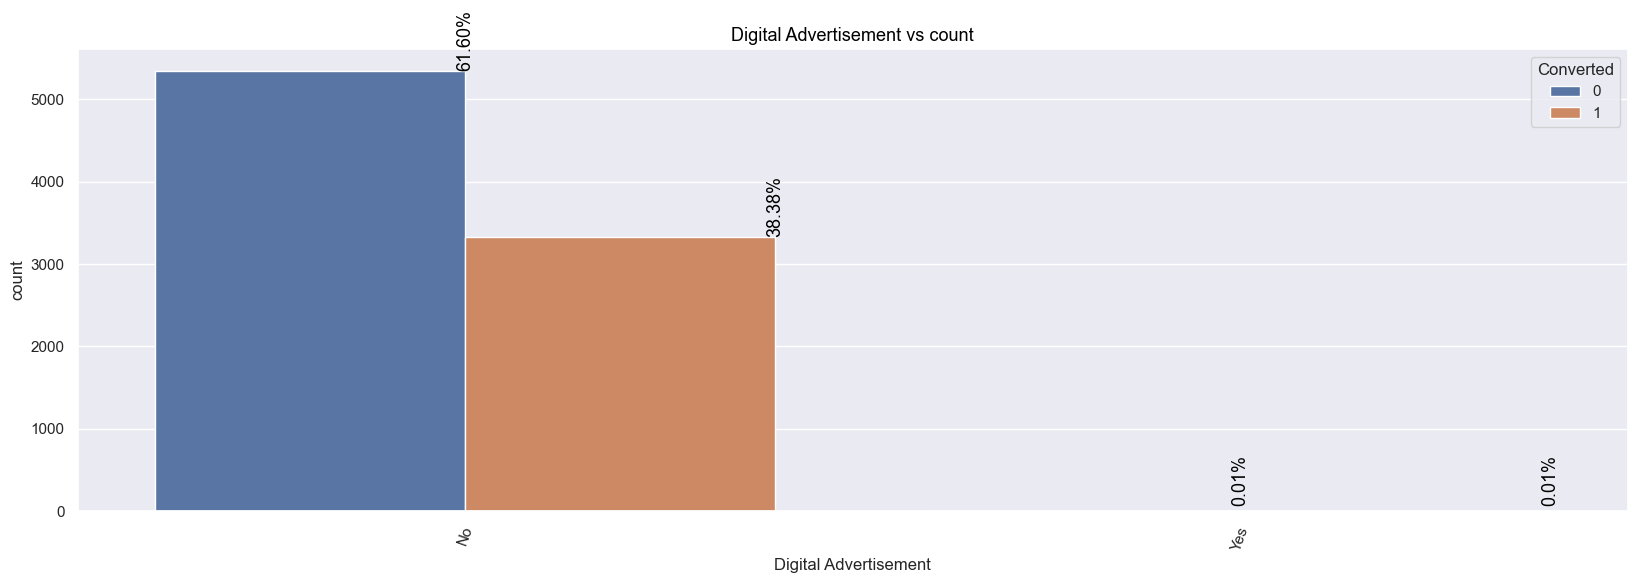

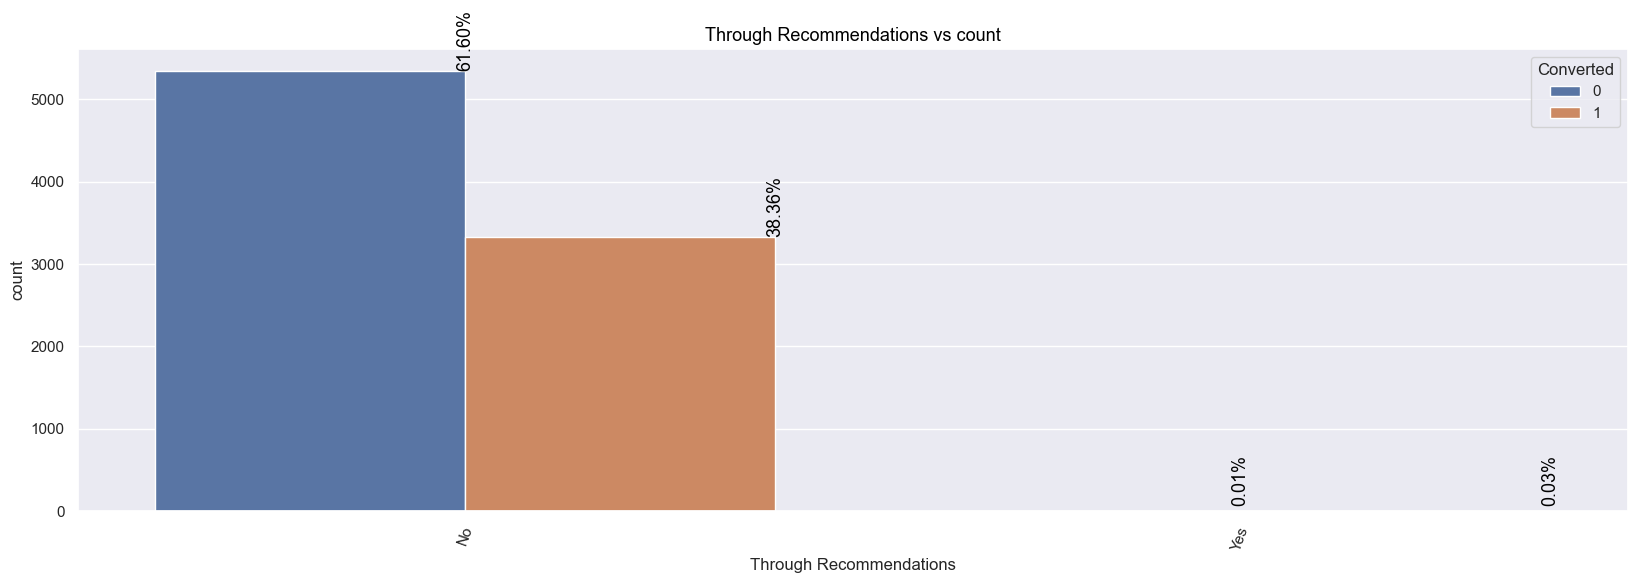

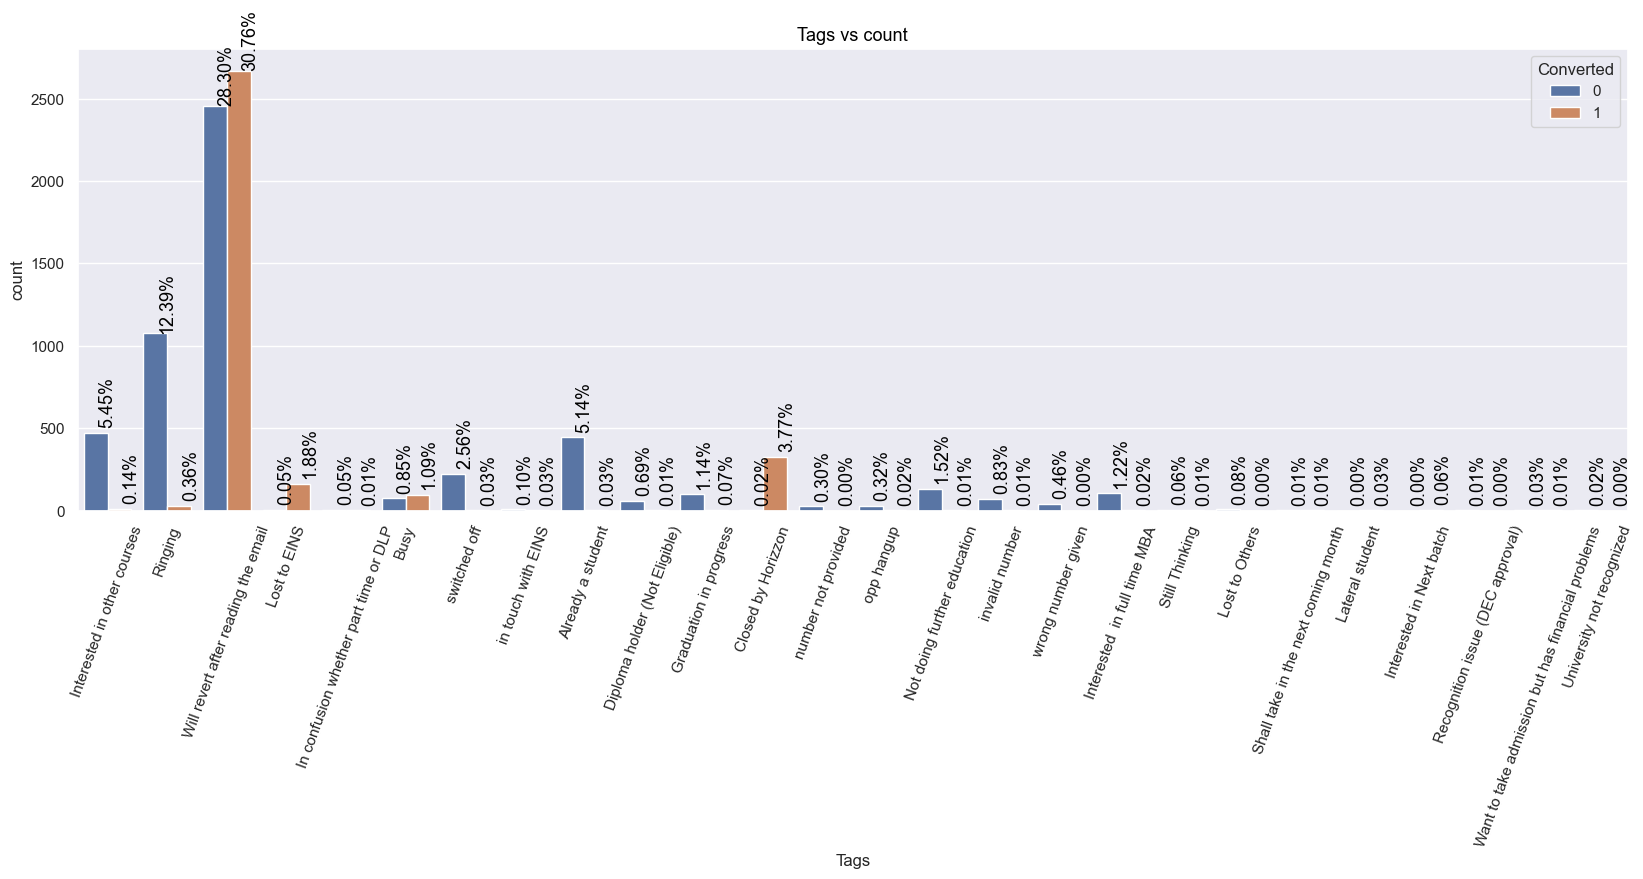

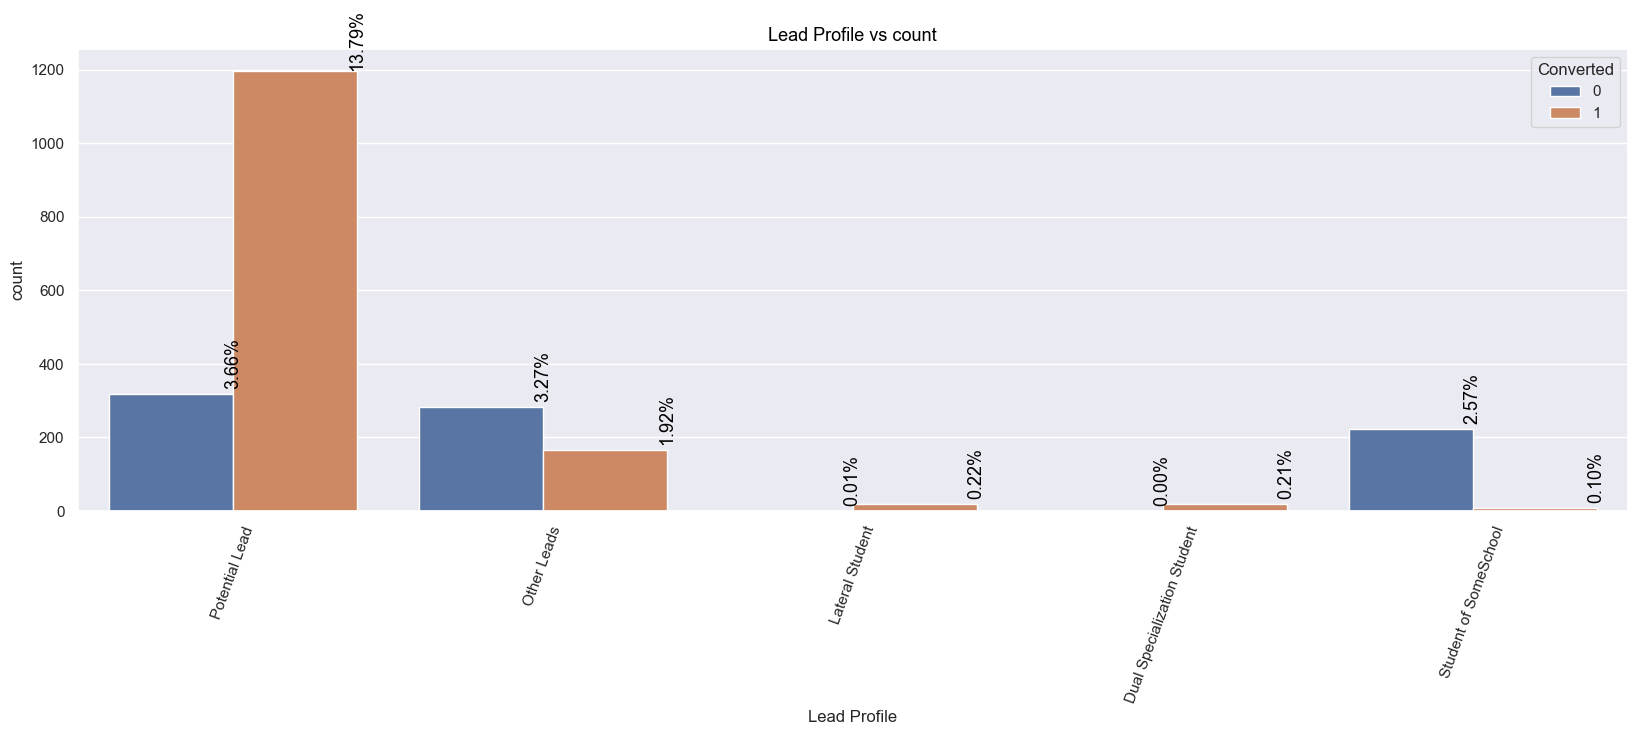

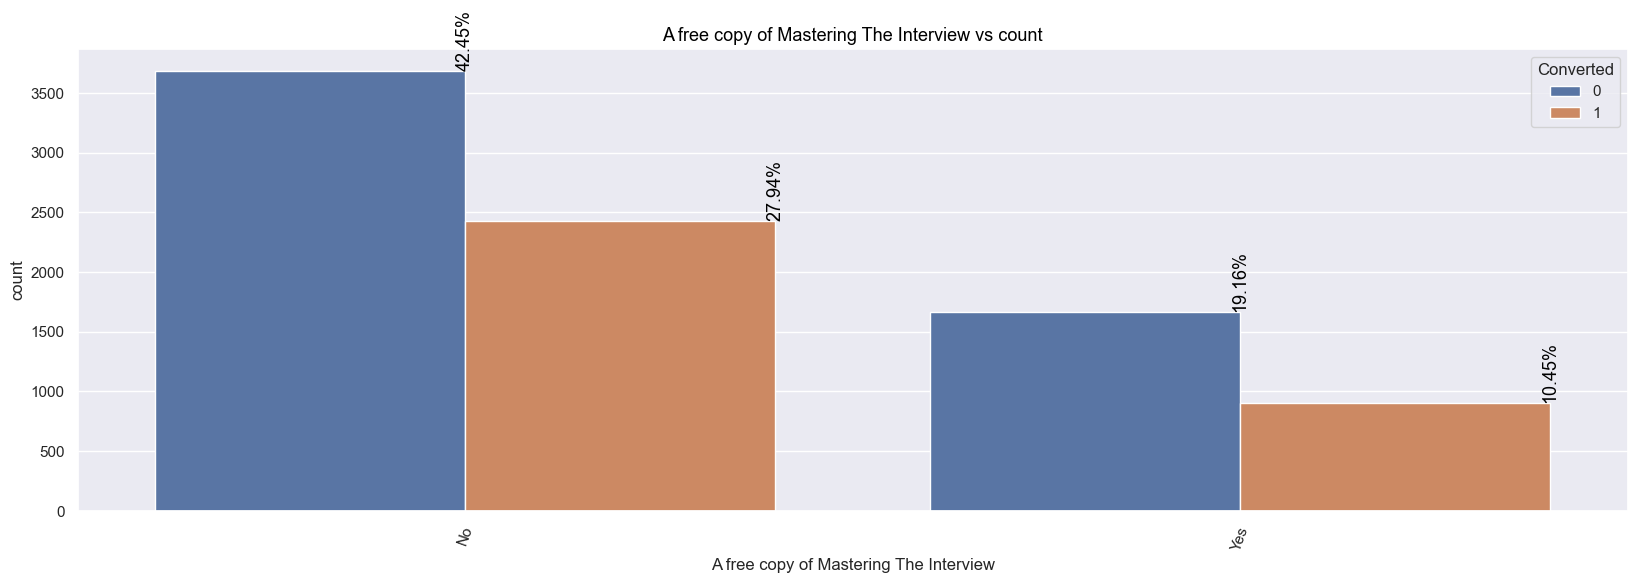

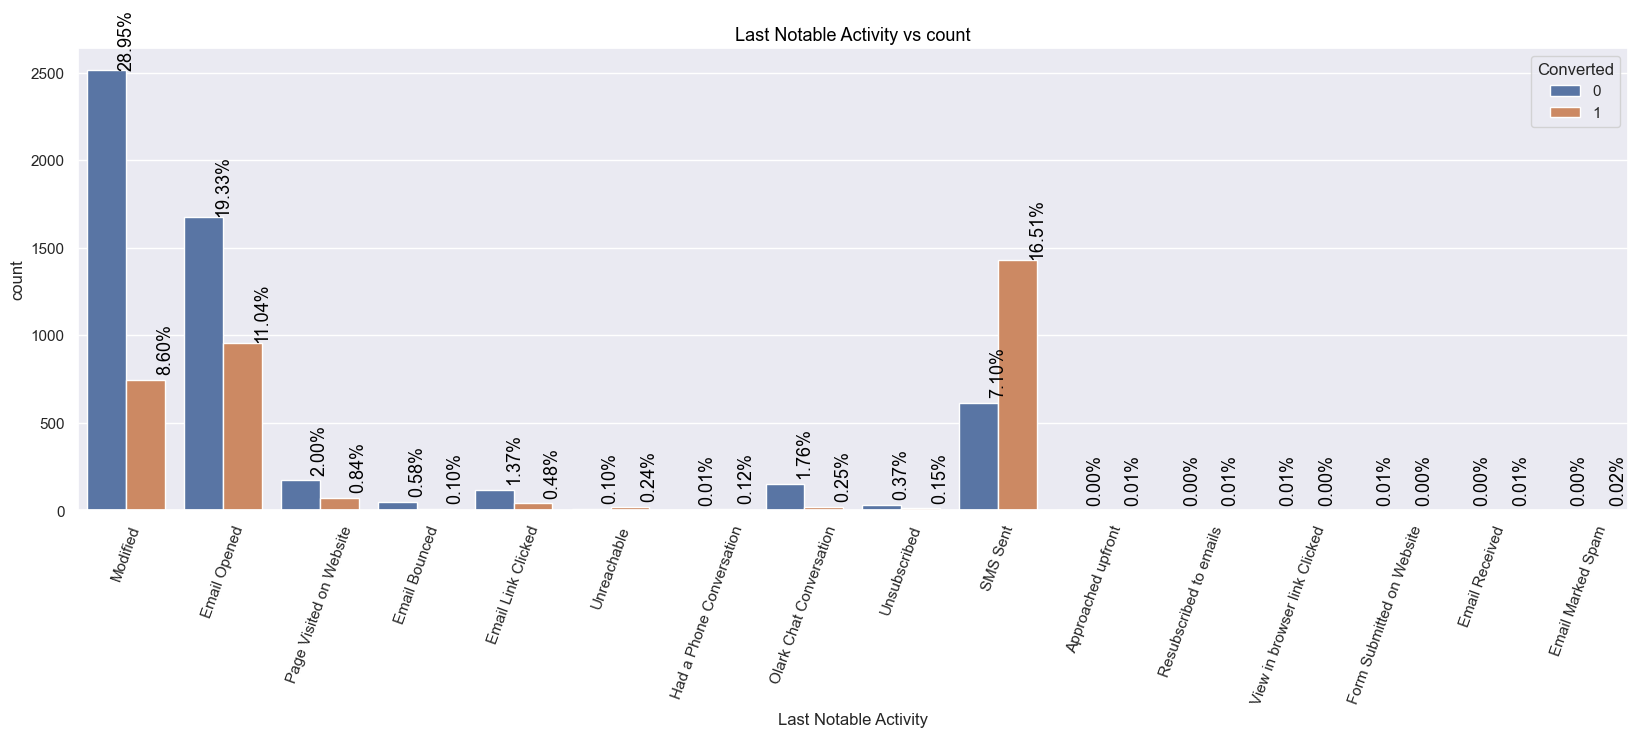

In [190]:
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
        'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'
        ]



sns.set(style="whitegrid")
sns.set(font_scale=1)
total = float(len(leads_data))   
for i in cat_cols:
    plt.figure(figsize=(20,6))
    ax=sns.countplot(x=i, hue='Converted', data= leads_data)
    ax.tick_params(axis='x', rotation = 70)
    title=i+" vs count"  
    plt.title(title,fontdict={'color':'black','fontsize':13})    
    
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha="center" , va='center', fontsize=13, color='black', xytext=(0, 22),rotation=90,
                 textcoords='offset points')
   
    plt.show()   		
		

# <font color="blue"><b><u>Inferences:</u></b></font>

#### <b>Lead Origin</b>

1.) Customers who were identified as Lead from Landing Page submission, constitute the majority of the leads.

2.) Customers originating from Lead Add Form have high probability of conversion. These Customers are very few in number.

3.) Lead Import has the least conversion rate. Customers from Lead Import are very few in number.



#### <b>Lead Source</b>

1.) Majority source of the lead is Google & Direct Traffic. 

2.) leads with source Reference has maximum probabilty of conversion.



#### <b>Do Not Email</b>

1.) Customers who opt for Do Not Mail have lower conversion rate.

2.) Customers who do not opt for Do Not Mail have higher conversion rate. These constitute the majority of the leads.



#### <b>Do Not Call</b>

Customers who do not opt for Do Not call have Higher conversion rate.These constitute the majority of the leads.



#### <b>Last Activity</b>

1.) Customers who last activity was SMS Sent have higher conversion rate. 

2.) Customers who last activity was Email Opened constitute majority of the customers.



#### <b>Specialisation</b>

1.) Management professions like Finance, HR, Marketing and Operations have very good count of conversion compared to other specializations.

2.) Leads with specialisation as Rural & Agribusiness, Services excellence, E-business  have least probabilty of conversion.



#### <b>How did you hear about X education </b>

1.) Maximum Leads are from online search.

2)  Minimum leads are from SMS and Email.



#### <b>What is your current occupation</b>

1.) Maximum Leads have occupation as Unemployed.

2.) Very few leads are Students



#### <b>What matters most to you in choosing a career</b>

People asking for Better Career Prospects show highly positive response in conversion.


#### <b>Newspaper , Digital Advertisement,through recommendations, Search Customers </b>

who have seen the add of the education company in any form,  are very few in number. Nothing meaningful insight can be concluded from the plot  that will impove the overall lead conversion rate.



#### <b>Tags</b>

More focus shall be given on the leads as will revert after reading the mail as these are potential leads and have higher rate of conversion.


#### <b> A Free Copy Of Mastering the Interview  </b>

Customer didn't demand for a free copy of Mastering the Interview have good count of conversion.


#### <b> Last Notable Activity</b>

1.) customers whose last notable activity was Modified are more in number.

2.) Customers whose last notable activity was SMS Sent have higher probability of conversion.

### Bivariate analysis w.r.t Target variable (numerical column vs numerical column)

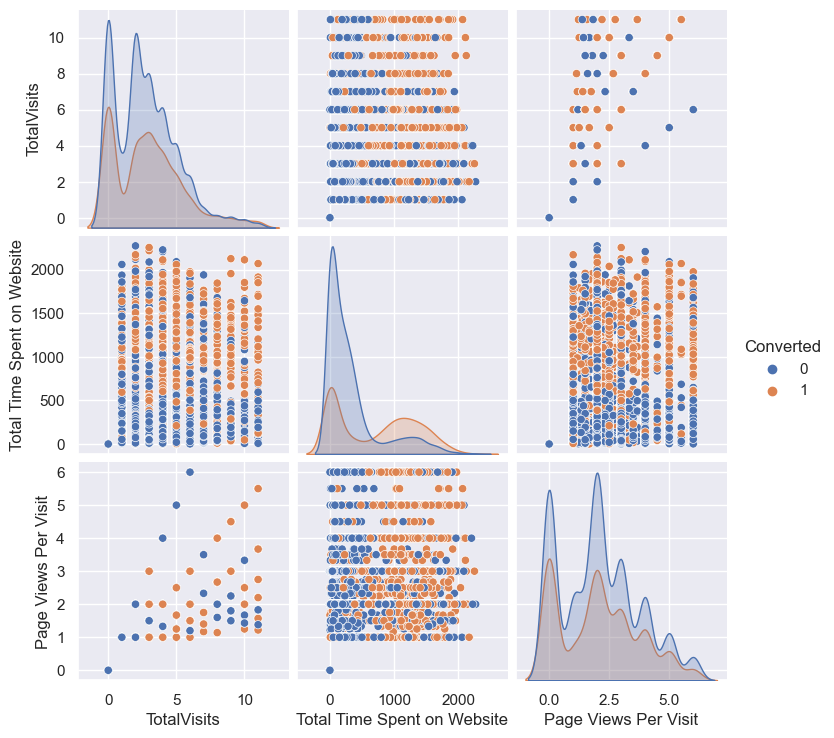

In [191]:
sns.pairplot(leads_data[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit','Converted']],hue='Converted',diag_kind='kde')

# <font color="blue"><b><u>Inferences:</u></b></font>
- there is strong positive correlation between the TotalVisits variable and Page Views Per Visit, 

## Multivariate analysis

Text(0.5, 1.0, 'Heat map to visualise data')

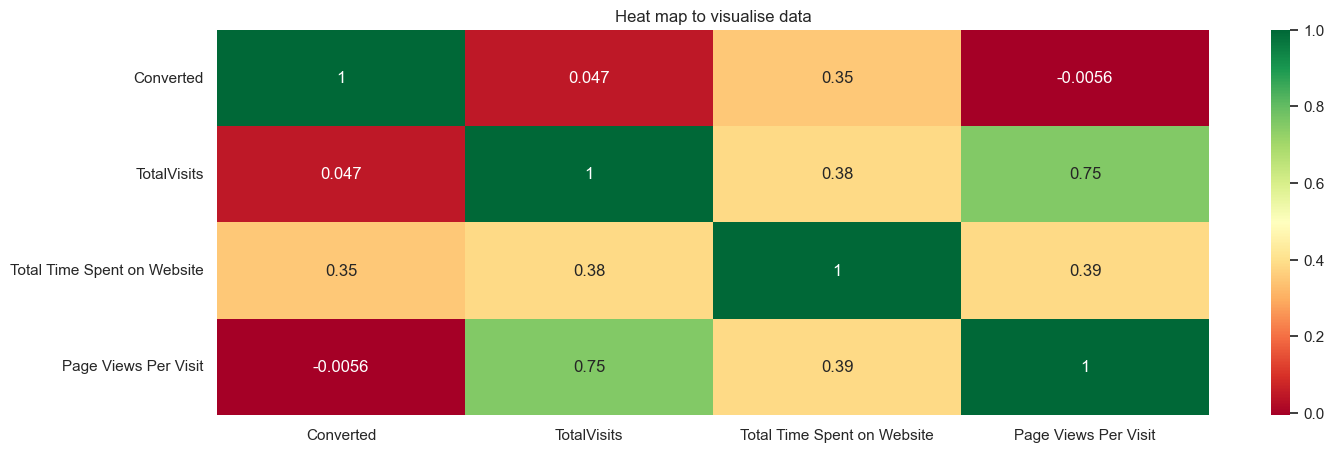

In [192]:
plt.figure(figsize = (16,5))
ax=sns.heatmap(leads_data.corr(),cmap="RdYlGn",annot=True)
ax.set_title('Heat map to visualise data')

# <font color="blue"><b><u>Inferences:</u></b></font>
- there is strong positive correlation 0.75 between the TotalVisits  and Page Views Per Visit
- there is positive correlation 0.38 between the TotalVisits  and Total Time Spent on Website
- there is positive correlation 0.39 between the Total Time Spent on Website  and Page Views Per Visit

### Bivariate analysis w.r.t Target variable (numerical column vs categorical column)

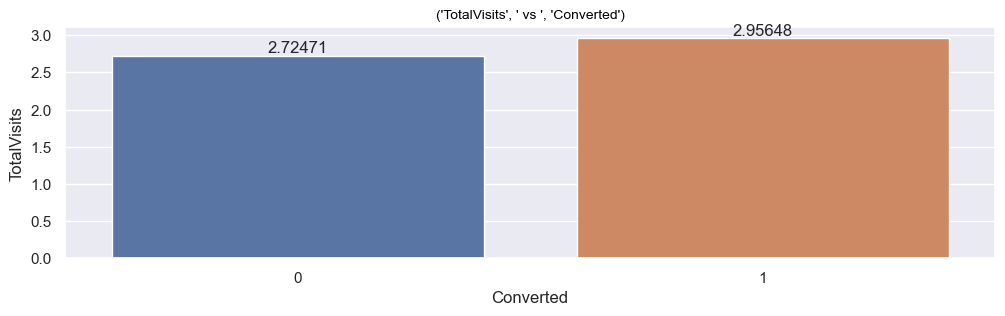

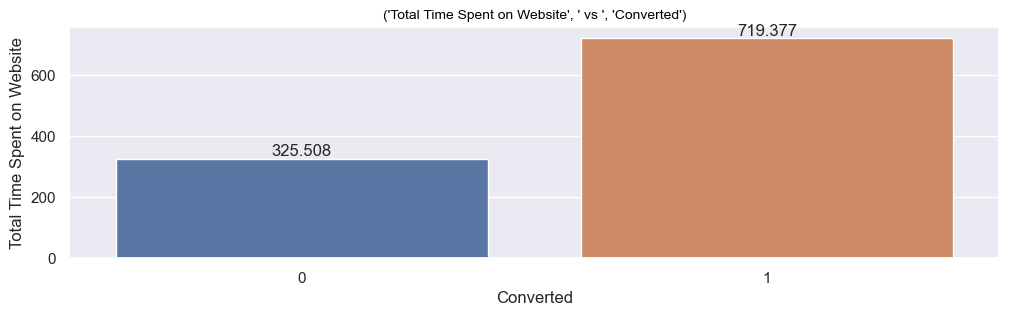

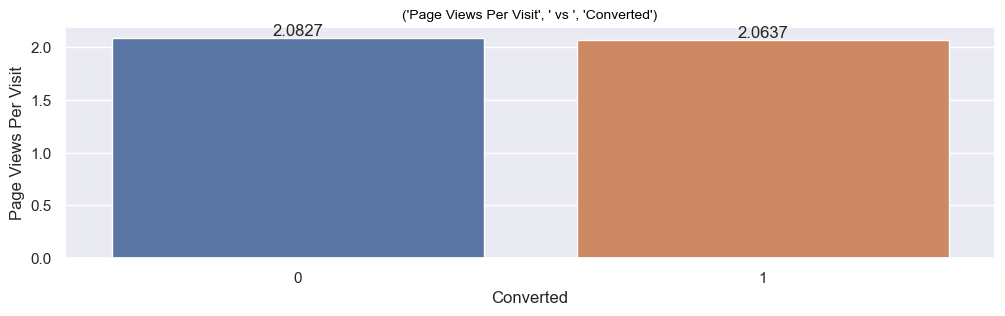

In [193]:
cat_biv_cols=['Converted']

numeric_biv_cols=['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
sns.set(rc={'figure.figsize':(12,3)})
sns.set(font_scale = 1)

for icatbiv in cat_biv_cols:
    
    for  jnumbiv in numeric_biv_cols:
        t=jnumbiv," vs ",icatbiv
        ax=sns.barplot(x=leads_data[icatbiv],y=leads_data[jnumbiv],estimator=np.mean,ci=False)
        
        #make dynamic title    
        plt.title(t,fontdict={'color':'black','fontsize':10})             
        for i in ax.containers:
            ax.bar_label(i) 
        plt.xticks(rotation=0)    
        plt.show()     

## <b><font color="blue">Inference: </font><b>

1) Converted leads have the highest Total time spent on website.

2) Converted leads have the highest Total visits.

# <b>Step 3 - Data Preparation</b>

#### Creating the dummy variables

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [194]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education',
'What matters most to you in choosing a course','What is your current occupation',
'Tags','Lead Profile','Last Notable Activity']], drop_first=True)
dummy_data.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [195]:
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy_data], axis=1)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,0,0,1,0,0,0,0,0,0,0


In [196]:
leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education',
'What matters most to you in choosing a course','What is your current occupation',
'Tags','Lead Profile','Last Notable Activity'], axis = 1, inplace = True)
leads_data.head(10)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,No,No,0,0.0,0,0.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
1,No,No,0,5.0,674,2.5,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
2,No,No,1,2.0,1532,2.0,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
3,No,No,0,1.0,305,1.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
4,No,No,1,2.0,1428,1.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
5,No,No,0,0.0,0,0.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
6,No,No,1,2.0,1640,2.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
7,No,No,0,0.0,0,0.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
8,No,No,0,2.0,71,2.0,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
9,No,No,0,4.0,58,4.0,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


#### Converting some binary variables (Yes/No) to 0/1

In [197]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Search'	,'Newspaper Article'	,'X Education Forums'	,'Newspaper',	'Digital Advertisement',
            'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [198]:
leads_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [199]:
leads_data.shape

(8679, 129)

## <b>Step 4: Splitting the Data into Training and Testing Sets</b>

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [202]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [203]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature Scaling

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
# rescale the variables like  TotalVisits, Total Time Spent on Website, Page Views Per Visit as they have large values as compared to the other variables of the dataset

scaler = MinMaxScaler()
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [206]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.0,6075.0,6075.000000,6075.000000,...,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,0.075062,0.000165,0.255159,0.211034,0.345821,0.000823,0.0,0.0,0.000165,0.000165,...,0.000165,0.001317,0.378601,0.020247,0.027325,0.000165,0.234239,0.003786,0.005267,0.000165
std,0.263513,0.012830,0.220585,0.242198,0.275634,0.028679,0.0,0.0,0.012830,0.012830,...,0.012830,0.036268,0.485078,0.140855,0.163042,0.012830,0.423557,0.061419,0.072392,0.012830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.272727,0.103862,0.333333,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.363636,0.405237,0.500000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <b>Step 5: Logistic Model Building</b>

In [207]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logreg = LogisticRegression()

In [208]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [209]:
# rfe.support_

In [210]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 53),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Search', False, 27),
 ('Newspaper Article', False, 104),
 ('X Education Forums', False, 105),
 ('Newspaper', False, 92),
 ('Digital Advertisement', False, 81),
 ('Through Recommendations', False, 82),
 ('A free copy of Mastering The Interview', False, 60),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 52),
 ('Lead Source_Direct Traffic', False, 71),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 84),
 ('Lead Source_Live Chat', False, 91),
 ('Lead Source_NC_EDM', False, 31),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 85),
 ('Lead Source_Pay per Click Ads', False, 102),
 ('Lead Source_Press_Release', False, 109),
 ('Lead Source_Reference'

In [211]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [212]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6054
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1428.6
Date:                Sun, 15 Oct 2023   Deviance:                       2857.3
Time:                        23:56:43   Pearson chi2:                 1.40e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5766
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.2195      0.324    -19.185      0.000      -6.855      -5.584
Total Time Spent on Website                              3.5248      0.204     17.254      0.000       3.124       3.925
Lead Origin_Lead Add Form                                1.8716      0.294      6.367      0.000       1.295       2.448
Lead Source_Welingak Website                             3.5096      1.055      3.328      0.001       1.443       5.577
Last Activity_Olark Chat Conversation                   -1.2440      0.212     -5.862      0.000      -1.660      -0.828
What is your current occupation_Working Professional     2.1787      0.277      7.873      0.000       1.636       2.721
Tags_Busy                                                3.3755      0.392      8.622      0.000       2.608       4.143
Tags_Closed by Horizzon                                  8.5178      0.805     10.583      0.000       6.940      10.095
Tags_Interested in other courses                        -0.8955      0.550     -1.627      0.104      -1.974       0.183
Tags_Lateral student                                    30.1272   1.46e+05      0.000      1.000   -2.86e+05    2.86e+05
Tags_Lost to EINS                                        8.7155      0.682     12.777      0.000       7.379      10.052
Tags_Not doing further education                       -22.3221   1.92e+04     -0.001      0.999   -3.76e+04    3.76e+04
Tags_Ringing                                            -1.0188      0.392     -2.597      0.009      -1.788      -0.250
Tags_Will revert after reading the email                 4.2244      0.312     13.543      0.000       3.613       4.836
Tags_invalid number                                    -22.3459   2.54e+04     -0.001      0.999   -4.98e+04    4.97e+04
Tags_switched off                                       -1.6896      0.684     -2.469      0.014      -3.031      -0.348
Tags_wrong number given                                -23.8420    3.2e+04     -0.001      0.999   -6.27e+04    6.27e+04
Lead Profile_Other Leads                                 3.0483      0.293     10.420      0.000       2.475       3.622
Lead Profile_Potential Lead                              2.9604      0.171     17.283      0.000       2.625       3.296
Last Notable Activity_Had a Phone Conversation          25.6024    6.4e+04      0.000      1.000   -1.25e+05    1.26e+05
Last Notable Activity_SMS Sent                           2.8625      0.127     22.561      0.000       2.614       3.111
========================================================================================================================
"""


#### Tags_Lateral student - variable has pvalue = 1.000 which is >0.05 so dropping this  variable as it is not significant.

In [213]:
col = col.drop('Tags_Lateral student')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [214]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6055
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1437.0
Date:                Sun, 15 Oct 2023   Deviance:                       2874.0
Time:                        23:56:43   Pearson chi2:                 1.39e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5755
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0427      0.310    -19.518      0.000      -6.650      -5.436
Total Time Spent on Website                              3.5073      0.204     17.229      0.000       3.108       3.906
Lead Origin_Lead Add Form                                1.8650      0.293      6.361      0.000       1.290       2.440
Lead Source_Welingak Website                             3.5099      1.054      3.329      0.001       1.444       5.576
Last Activity_Olark Chat Conversation                   -1.2501      0.212     -5.901      0.000      -1.665      -0.835
What is your current occupation_Working Professional     2.1663      0.275      7.875      0.000       1.627       2.705
Tags_Busy                                                3.2146      0.380      8.451      0.000       2.469       3.960
Tags_Closed by Horizzon                                  8.3467      0.799     10.443      0.000       6.780       9.913
Tags_Interested in other courses                        -1.0400      0.543     -1.914      0.056      -2.105       0.025
Tags_Lost to EINS                                        8.5426      0.675     12.648      0.000       7.219       9.866
Tags_Not doing further education                       -22.4548   1.92e+04     -0.001      0.999   -3.76e+04    3.76e+04
Tags_Ringing                                            -1.1770      0.382     -3.080      0.002      -1.926      -0.428
Tags_Will revert after reading the email                 4.0554      0.298     13.630      0.000       3.472       4.639
Tags_invalid number                                    -22.5094   2.54e+04     -0.001      0.999   -4.98e+04    4.98e+04
Tags_switched off                                       -1.8484      0.679     -2.723      0.006      -3.179      -0.518
Tags_wrong number given                                -23.9919    3.2e+04     -0.001      0.999   -6.28e+04    6.27e+04
Lead Profile_Other Leads                                 2.9905      0.287     10.402      0.000       2.427       3.554
Lead Profile_Potential Lead                              2.9590      0.171     17.348      0.000       2.625       3.293
Last Notable Activity_Had a Phone Conversation          25.5981    6.4e+04      0.000      1.000   -1.25e+05    1.26e+05
Last Notable Activity_SMS Sent                           2.8528      0.127     22.547      0.000       2.605       3.101
========================================================================================================================
"""


#### Last Notable Activity_Had a Phone Conversation - variable has pvalue = 1.000 which is >0.05 so dropping this  variable as it is not significant.

In [215]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [216]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.9
Date:                Sun, 15 Oct 2023   Deviance:                       2883.7
Time:                        23:56:44   Pearson chi2:                 1.38e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5748
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0383      0.309    -19.517      0.000      -6.645      -5.432
Total Time Spent on Website                              3.5061      0.203     17.244      0.000       3.108       3.905
Lead Origin_Lead Add Form                                1.8589      0.293      6.341      0.000       1.284       2.433
Lead Source_Welingak Website                             3.5074      1.054      3.327      0.001       1.441       5.574
Last Activity_Olark Chat Conversation                   -1.2589      0.212     -5.945      0.000      -1.674      -0.844
What is your current occupation_Working Professional     2.1800      0.274      7.952      0.000       1.643       2.717
Tags_Busy                                                3.2158      0.380      8.458      0.000       2.471       3.961
Tags_Closed by Horizzon                                  8.3454      0.799     10.441      0.000       6.779       9.912
Tags_Interested in other courses                        -1.0421      0.544     -1.917      0.055      -2.107       0.023
Tags_Lost to EINS                                        8.5402      0.675     12.643      0.000       7.216       9.864
Tags_Not doing further education                       -22.4544   1.92e+04     -0.001      0.999   -3.77e+04    3.76e+04
Tags_Ringing                                            -1.1722      0.382     -3.069      0.002      -1.921      -0.424
Tags_Will revert after reading the email                 4.0606      0.297     13.654      0.000       3.478       4.643
Tags_invalid number                                    -22.5055   2.54e+04     -0.001      0.999   -4.98e+04    4.98e+04
Tags_switched off                                       -1.8434      0.679     -2.716      0.007      -3.174      -0.513
Tags_wrong number given                                -23.9861    3.2e+04     -0.001      0.999   -6.28e+04    6.28e+04
Lead Profile_Other Leads                                 2.9852      0.288     10.380      0.000       2.422       3.549
Lead Profile_Potential Lead                              2.9561      0.170     17.346      0.000       2.622       3.290
Last Notable Activity_SMS Sent                           2.8444      0.126     22.495      0.000       2.597       3.092
========================================================================================================================
"""


#### Tags_wrong number given -  variable has pvalue = 0.999 which is >0.05 so dropping this variable as it is not significant.

In [217]:
col = col.drop('Tags_wrong number given')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Profile_Other Leads',
       'Lead Profile_Potential Lead', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [218]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1445.5
Date:                Sun, 15 Oct 2023   Deviance:                       2891.0
Time:                        23:56:44   Pearson chi2:                 1.39e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5743
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.1900      0.313    -19.803      0.000      -6.803      -5.577
Total Time Spent on Website                              3.4971      0.203     17.224      0.000       3.099       3.895
Lead Origin_Lead Add Form                                1.8638      0.293      6.363      0.000       1.290       2.438
Lead Source_Welingak Website                             3.4984      1.054      3.319      0.001       1.432       5.565
Last Activity_Olark Chat Conversation                   -1.2598      0.212     -5.949      0.000      -1.675      -0.845
What is your current occupation_Working Professional     2.1895      0.275      7.956      0.000       1.650       2.729
Tags_Busy                                                3.3821      0.381      8.873      0.000       2.635       4.129
Tags_Closed by Horizzon                                  8.4978      0.800     10.616      0.000       6.929      10.067
Tags_Interested in other courses                        -0.8818      0.545     -1.619      0.105      -1.949       0.186
Tags_Lost to EINS                                        8.6934      0.677     12.843      0.000       7.367      10.020
Tags_Not doing further education                       -22.2934   1.92e+04     -0.001      0.999   -3.77e+04    3.76e+04
Tags_Ringing                                            -0.9970      0.382     -2.607      0.009      -1.746      -0.248
Tags_Will revert after reading the email                 4.2185      0.300     14.054      0.000       3.630       4.807
Tags_invalid number                                    -22.3318   2.54e+04     -0.001      0.999   -4.99e+04    4.98e+04
Tags_switched off                                       -1.6669      0.679     -2.456      0.014      -2.997      -0.336
Lead Profile_Other Leads                                 2.9790      0.288     10.362      0.000       2.416       3.543
Lead Profile_Potential Lead                              2.9481      0.170     17.308      0.000       2.614       3.282
Last Notable Activity_SMS Sent                           2.8236      0.126     22.484      0.000       2.577       3.070
========================================================================================================================
"""


#### Tags_Not doing further education -  variable has pvalue =0.999 which is >0.05 so dropping this variable as it is not significant.

In [219]:
col = col.drop('Tags_Not doing further education')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Profile_Other Leads',
       'Lead Profile_Potential Lead', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [220]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.3
Date:                Sun, 15 Oct 2023   Deviance:                       2898.6
Time:                        23:56:44   Pearson chi2:                 1.43e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5737
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4127      0.311    -20.588      0.000      -7.023      -5.802
Total Time Spent on Website                              3.4906      0.203     17.218      0.000       3.093       3.888
Lead Origin_Lead Add Form                                1.8683      0.293      6.374      0.000       1.294       2.443
Lead Source_Welingak Website                             3.4934      1.054      3.314      0.001       1.427       5.560
Last Activity_Olark Chat Conversation                   -1.2530      0.212     -5.919      0.000      -1.668      -0.838
What is your current occupation_Working Professional     2.2026      0.277      7.955      0.000       1.660       2.745
Tags_Busy                                                3.6095      0.379      9.527      0.000       2.867       4.352
Tags_Closed by Horizzon                                  8.7193      0.800     10.901      0.000       7.152      10.287
Tags_Interested in other courses                        -0.6365      0.543     -1.173      0.241      -1.700       0.427
Tags_Lost to EINS                                        8.9156      0.676     13.184      0.000       7.590      10.241
Tags_Ringing                                            -0.7756      0.381     -2.037      0.042      -1.522      -0.029
Tags_Will revert after reading the email                 4.4414      0.299     14.879      0.000       3.856       5.026
Tags_invalid number                                    -21.1132   1.54e+04     -0.001      0.999   -3.03e+04    3.02e+04
Tags_switched off                                       -1.4452      0.678     -2.131      0.033      -2.774      -0.116
Lead Profile_Other Leads                                 2.9036      0.282     10.308      0.000       2.352       3.456
Lead Profile_Potential Lead                              2.9506      0.170     17.317      0.000       2.617       3.285
Last Notable Activity_SMS Sent                           2.8317      0.126     22.504      0.000       2.585       3.078
========================================================================================================================
"""


#### Tags_invalid number -  variable has pvalue =0.999 which is >0.05 so dropping this variable as it is not significant.

In [221]:
col = col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [222]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.1
Date:                Sun, 15 Oct 2023   Deviance:                       2902.3
Time:                        23:56:44   Pearson chi2:                 1.45e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5735
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.5382      0.309    -21.190      0.000      -7.143      -5.933
Total Time Spent on Website                              3.5016      0.203     17.273      0.000       3.104       3.899
Lead Origin_Lead Add Form                                1.8749      0.293      6.394      0.000       1.300       2.450
Lead Source_Welingak Website                             3.4885      1.054      3.309      0.001       1.422       5.555
Last Activity_Olark Chat Conversation                   -1.2531      0.212     -5.915      0.000      -1.668      -0.838
What is your current occupation_Working Professional     2.2095      0.278      7.953      0.000       1.665       2.754
Tags_Busy                                                3.7346      0.376      9.935      0.000       2.998       4.471
Tags_Closed by Horizzon                                  8.8418      0.799     11.067      0.000       7.276      10.408
Tags_Interested in other courses                        -0.5264      0.542     -0.972      0.331      -1.588       0.535
Tags_Lost to EINS                                        9.0395      0.675     13.391      0.000       7.716      10.363
Tags_Ringing                                            -0.6442      0.376     -1.711      0.087      -1.382       0.094
Tags_Will revert after reading the email                 4.5659      0.295     15.462      0.000       3.987       5.145
Tags_switched off                                       -1.3127      0.675     -1.944      0.052      -2.636       0.011
Lead Profile_Other Leads                                 2.9418      0.284     10.375      0.000       2.386       3.497
Lead Profile_Potential Lead                              2.9459      0.170     17.327      0.000       2.613       3.279
Last Notable Activity_SMS Sent                           2.8199      0.125     22.516      0.000       2.574       3.065
========================================================================================================================
"""


#### Tags_Interested in other courses -  variable has pvalue =0.331 which is >0.05 so dropping this variable as it is not significant.

In [223]:
col = col.drop('Tags_Interested in other courses')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [224]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.6
Date:                Sun, 15 Oct 2023   Deviance:                       2903.3
Time:                        23:56:44   Pearson chi2:                 1.46e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5734
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.6783      0.282    -23.652      0.000      -7.232      -6.125
Total Time Spent on Website                              3.5021      0.203     17.276      0.000       3.105       3.899
Lead Origin_Lead Add Form                                1.8687      0.293      6.385      0.000       1.295       2.442
Lead Source_Welingak Website                             3.4938      1.054      3.315      0.001       1.428       5.560
Last Activity_Olark Chat Conversation                   -1.2565      0.212     -5.935      0.000      -1.671      -0.842
What is your current occupation_Working Professional     2.1830      0.274      7.961      0.000       1.646       2.720
Tags_Busy                                                3.8722      0.355     10.897      0.000       3.176       4.569
Tags_Closed by Horizzon                                  8.9844      0.789     11.391      0.000       7.439      10.530
Tags_Lost to EINS                                        9.1804      0.663     13.841      0.000       7.880      10.480
Tags_Ringing                                            -0.5059      0.355     -1.424      0.154      -1.202       0.190
Tags_Will revert after reading the email                 4.7064      0.267     17.608      0.000       4.183       5.230
Tags_switched off                                       -1.1748      0.664     -1.770      0.077      -2.476       0.126
Lead Profile_Other Leads                                 2.9441      0.284     10.382      0.000       2.388       3.500
Lead Profile_Potential Lead                              2.9435      0.170     17.333      0.000       2.611       3.276
Last Notable Activity_SMS Sent                           2.8240      0.125     22.538      0.000       2.578       3.070
========================================================================================================================
"""


#### Tags_Ringing -  variable has pvalue =0.154 which is >0.05 so dropping this variable as it is not significant.

In [225]:
col = col.drop('Tags_Ringing')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [226]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1452.7
Date:                Sun, 15 Oct 2023   Deviance:                       2905.3
Time:                        23:56:45   Pearson chi2:                 1.41e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5733
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9347      0.229    -30.264      0.000      -7.384      -6.486
Total Time Spent on Website                              3.5055      0.203     17.286      0.000       3.108       3.903
Lead Origin_Lead Add Form                                1.8635      0.290      6.420      0.000       1.295       2.432
Lead Source_Welingak Website                             3.4988      1.053      3.322      0.001       1.434       5.563
Last Activity_Olark Chat Conversation                   -1.2579      0.212     -5.929      0.000      -1.674      -0.842
What is your current occupation_Working Professional     2.2080      0.277      7.978      0.000       1.666       2.750
Tags_Busy                                                4.1356      0.311     13.306      0.000       3.526       4.745
Tags_Closed by Horizzon                                  9.2404      0.771     11.982      0.000       7.729      10.752
Tags_Lost to EINS                                        9.4365      0.642     14.687      0.000       8.177      10.696
Tags_Will revert after reading the email                 4.9656      0.208     23.887      0.000       4.558       5.373
Tags_switched off                                       -0.9028      0.638     -1.414      0.157      -2.154       0.348
Lead Profile_Other Leads                                 3.0339      0.284     10.697      0.000       2.478       3.590
Lead Profile_Potential Lead                              2.9462      0.170     17.342      0.000       2.613       3.279
Last Notable Activity_SMS Sent                           2.7936      0.123     22.758      0.000       2.553       3.034
========================================================================================================================
"""


#### Tags_switched off-  variable has pvalue =0.157 which is >0.05 so dropping this variable as it is not significant.

#### <font color="blue"><b>Below is our Final Model</b></font>

In [227]:
col = col.drop('Tags_switched off')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Profile_Other Leads',
       'Lead Profile_Potential Lead', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [228]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6062
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1453.9
Date:                Sun, 15 Oct 2023   Deviance:                       2907.8
Time:                        23:56:45   Pearson chi2:                 1.46e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5731
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.0184      0.226    -31.096      0.000      -7.461      -6.576
Total Time Spent on Website                              3.5080      0.203     17.317      0.000       3.111       3.905
Lead Origin_Lead Add Form                                1.8786      0.291      6.445      0.000       1.307       2.450
Lead Source_Welingak Website                             3.4837      1.054      3.306      0.001       1.419       5.549
Last Activity_Olark Chat Conversation                   -1.2578      0.212     -5.926      0.000      -1.674      -0.842
What is your current occupation_Working Professional     2.2196      0.278      7.992      0.000       1.675       2.764
Tags_Busy                                                4.2220      0.307     13.731      0.000       3.619       4.825
Tags_Closed by Horizzon                                  9.3211      0.770     12.100      0.000       7.811      10.831
Tags_Lost to EINS                                        9.5199      0.641     14.845      0.000       8.263      10.777
Tags_Will revert after reading the email                 5.0503      0.204     24.811      0.000       4.651       5.449
Lead Profile_Other Leads                                 3.0579      0.285     10.720      0.000       2.499       3.617
Lead Profile_Potential Lead                              2.9352      0.169     17.355      0.000       2.604       3.267
Last Notable Activity_SMS Sent                           2.7840      0.122     22.727      0.000       2.544       3.024
========================================================================================================================
"""

In [229]:
from sklearn import metrics

#### Checking VIFs

In [230]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.99
1,Lead Origin_Lead Add Form,1.85
0,Total Time Spent on Website,1.81
10,Lead Profile_Potential Lead,1.45
11,Last Notable Activity_SMS Sent,1.42
6,Tags_Closed by Horizzon,1.37
2,Lead Source_Welingak Website,1.33
4,What is your current occupation_Working Profes...,1.26
3,Last Activity_Olark Chat Conversation,1.14
5,Tags_Busy,1.05


#### VIF has value < 5 so there is no multicollinearity between independent variables.

In [232]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5182    0.020334
8469    0.001193
8382    0.007796
8031    0.035934
6712    0.999402
6332    0.998971
458     0.200076
1628    0.122587
5935    0.022726
4201    0.001085
dtype: float64

In [233]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
5182,0,0.020334
8469,0,0.001193
8382,0,0.007796
8031,0,0.035934
6712,1,0.999402


## <b> Step 6 :  sensitivity and specificity approach on training data set <b>

###  Plotting the ROC Curve

In [234]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [235]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

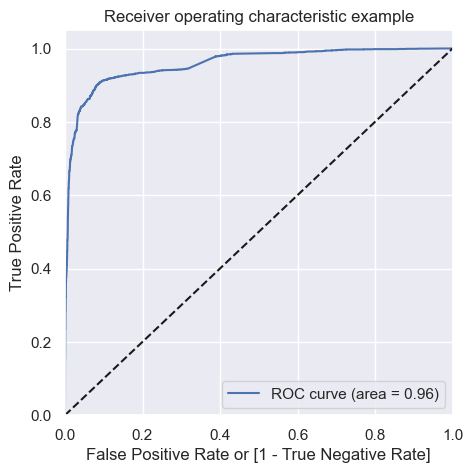

In [236]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [237]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5182,0,0.020334,1,0,0,0,0,0,0,0,0,0
8469,0,0.001193,1,0,0,0,0,0,0,0,0,0
8382,0,0.007796,1,0,0,0,0,0,0,0,0,0
8031,0,0.035934,1,0,0,0,0,0,0,0,0,0
6712,1,0.999402,1,1,1,1,1,1,1,1,1,1


In [238]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381728  1.000000  0.000000
0.1   0.1  0.749630  0.978870  0.608094
0.2   0.2  0.881481  0.924536  0.854899
0.3   0.3  0.907984  0.909013  0.907348
0.4   0.4  0.910288  0.887883  0.924121
0.5   0.5  0.910617  0.861147  0.941161
0.6   0.6  0.912757  0.834411  0.961129
0.7   0.7  0.896790  0.776628  0.970980
0.8   0.8  0.878683  0.708926  0.983493
0.9   0.9  0.856626  0.640793  0.989883


### <b>Sensitivity & Specificity tradeoff</b>

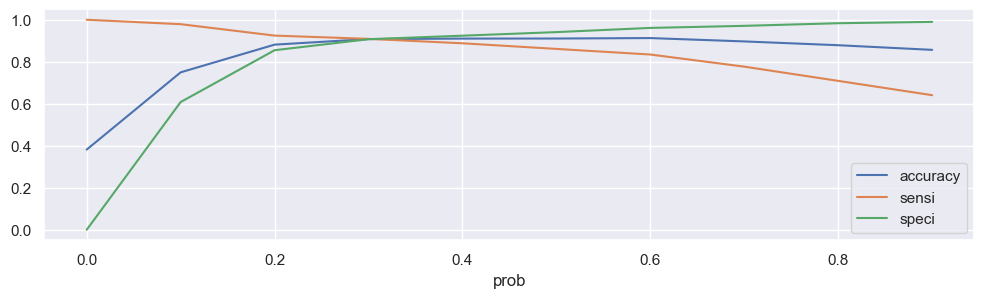

In [239]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [240]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5182,0,0.020334,1,0,0,0,0,0,0,0,0,0,0
8469,0,0.001193,1,0,0,0,0,0,0,0,0,0,0
8382,0,0.007796,1,0,0,0,0,0,0,0,0,0,0
8031,0,0.035934,1,0,0,0,0,0,0,0,0,0,0
6712,1,0.999402,1,1,1,1,1,1,1,1,1,1,1


### Accuracy 

In [241]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9079835390946502

In [242]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3408,  348],
       [ 211, 2108]], dtype=int64)

In [243]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity

In [244]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9090125053902545

### Specificity

In [245]:
# Let us calculate specificity
TN / float(TN+FP)

0.9073482428115016

### False positive rate 

In [246]:
# Calculate false positive rate 
print(FP/ float(TN+FP))

0.0926517571884984


### Positive predictive value 

In [247]:
# positive predictive value 
print (TP / float(TP+FP))

0.8583061889250815


### Negative predictive value

In [248]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9416966012710694


## <font color="blue"> <b><u>Observation</u></b></font>
### <font color="blue"> <b> Train Data Set: </font>

- <font color="black"> Accuracy 90.79% </font>
- <font color="black"> Sensitivity 90.90%</font>
- <font color="black"> Specificity 90.73% </font> </b> 

### <b> Step 7:  Making Predictions and model evaluation using sensitivity and specificity on test data set</b>

In [249]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [250]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Profile_Other Leads,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent
475,0.000000,1,0,0,0,0,0,1,0,0,1,0
2461,0.000000,1,1,0,0,0,0,0,1,0,0,1
1890,0.075011,0,0,0,0,0,0,0,1,0,0,0
6007,0.041722,0,0,0,0,0,0,0,0,0,0,0
4052,0.066578,0,0,0,0,0,0,0,0,0,0,1


In [251]:
X_test_sm = sm.add_constant(X_test)

In [252]:
y_test_pred = res.predict(X_test_sm)

In [253]:
y_test_pred[:10]

475     0.999335
2461    0.997930
1890    0.153812
6007    0.001035
4052    0.017970
7587    0.001444
2066    0.004768
7285    0.966200
3269    0.038200
4817    0.005222
dtype: float64

In [254]:
y_test_pred_final = pd.DataFrame({'Converted_Test':y_test.values, 'Converted_Test_Prob':y_test_pred})
y_test_pred_final.head()

,Converted_Test,Converted_Test_Prob
475,1,0.999335
2461,1,0.997930
1890,0,0.153812
6007,0,0.001035
4052,0,0.017970


In [255]:

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Test_Prob.map(lambda x: 1 if x > 0.3 else 0)


In [256]:
y_test_pred_final.head()

,Converted_Test,Converted_Test_Prob,final_predicted
475,1,0.999335,1
2461,1,0.997930,1
1890,0,0.153812,0
6007,0,0.001035,0
4052,0,0.017970,0


In [257]:
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Profile_Other Leads,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent
475,0.000000,1,0,0,0,0,0,1,0,0,1,0
2461,0.000000,1,1,0,0,0,0,0,1,0,0,1
1890,0.075011,0,0,0,0,0,0,0,1,0,0,0
6007,0.041722,0,0,0,0,0,0,0,0,0,0,0
4052,0.066578,0,0,0,0,0,0,0,0,0,0,1


In [258]:
# Appending y_test_df and y_pred_1
test_data = pd.concat([X_test, y_test_pred_final],axis=1)


In [259]:
test_data.to_csv('test_predict.csv')

### Accuracy

In [260]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted_Test, y_test_pred_final.final_predicted)

0.9047619047619048

In [261]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted_Test, y_test_pred_final.final_predicted )
confusion_test

array([[1442,  149],
       [  99,  914]], dtype=int64)

In [262]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

### Sensitivity

In [263]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9022704837117473

### Specificity

In [264]:
# Let us calculate specificity
TN / float(TN+FP)

0.9063482086737901

### False positive rate 

In [265]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.09365179132620993


### Positive predictive value 

In [266]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8598306679209784


### Negative predictive value

In [267]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9357560025957171


## <font color="blue"> <b><u>Observation</u></b></font>
### <font color="blue"> <b> Test Data Set: </font>

- <font color="black"> Accuracy 90.47% </font>
- <font color="black"> Sensitivity 90.22%</font>
- <font color="black"> Specificity 90.63% </font> </b> 

## <b> Step 8:  Precision and recall approach on training data set </b>

In [268]:
from sklearn.metrics import precision_recall_curve

In [269]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

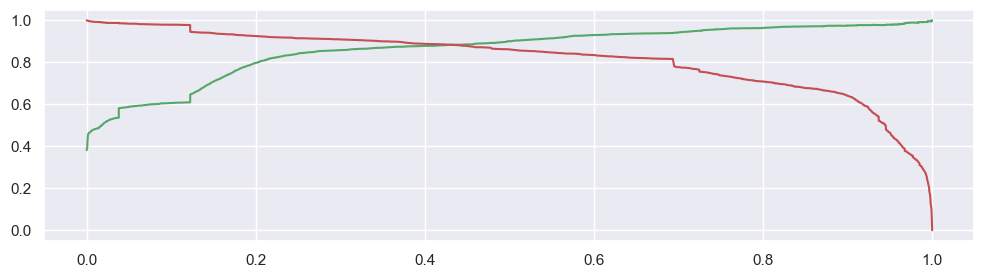

In [270]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [271]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5182,0,0.020334,1,0,0,0,0,0,0,0,0,0,0
8469,0,0.001193,1,0,0,0,0,0,0,0,0,0,0
8382,0,0.007796,1,0,0,0,0,0,0,0,0,0,0
8031,0,0.035934,1,0,0,0,0,0,0,0,0,0,0
6712,1,0.999402,1,1,1,1,1,1,1,1,1,1,1


### Accuracy

In [272]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9104526748971193

In [273]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3478,  278],
       [ 266, 2053]], dtype=int64)

In [274]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Precision

In [275]:
TP/(TP+FP)

0.8807378807378807

#### Recall

In [276]:
TP/(TP+FN)

0.8852953859422165

## <font color="blue"> <b><u>Observation</u></b></font>
### <font color="blue"> <b> Training Data Set: </font>

- <font color="black"> Accuracy 91.04% </font>
- <font color="black"> Precision 88.07%</font>
- <font color="black"> Recall 88.52% </font> </b> 

## <b>Step 9: Making Predictions on the Test Set using precision and recall</b>

In [277]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [278]:
y_test_pred[:10]

475     0.999335
2461    0.997930
1890    0.153812
6007    0.001035
4052    0.017970
7587    0.001444
2066    0.004768
7285    0.966200
3269    0.038200
4817    0.005222
dtype: float64

In [279]:
# Converting y_pred to a dataframe which is an array
y_predict_val_test = pd.DataFrame(y_test_pred)

In [280]:
y_test_predict_final = pd.concat([y_test, y_predict_val_test],axis=1)

In [281]:
y_test_predict_final.head()

,Converted,0
475,1,0.999335
2461,1,0.997930
1890,0,0.153812
6007,0,0.001035
4052,0,0.017970


In [282]:
# Renaming the column 
y_predict_final_test= y_test_predict_final.rename(columns={ 0 : 'Converted_Prob'})

In [283]:
y_predict_final_test.head()

,Converted,Converted_Prob
475,1,0.999335
2461,1,0.997930
1890,0,0.153812
6007,0,0.001035
4052,0,0.017970


In [284]:
# Making predictions on the test set using 0.44 as the cutoff

y_predict_final_test['final_predicted'] = y_predict_final_test.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [285]:
y_predict_final_test.head()

,Converted,Converted_Prob,final_predicted
475,1,0.999335,1
2461,1,0.997930,1
1890,0,0.153812,0
6007,0,0.001035,0
4052,0,0.017970,0


### Accuracy

In [286]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_predict_final_test.Converted, y_predict_final_test.final_predicted)

0.9062980030721967

In [287]:
confusion2 = metrics.confusion_matrix(y_predict_final_test.Converted, y_predict_final_test.final_predicted )
confusion2

array([[1473,  118],
       [ 126,  887]], dtype=int64)

In [288]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Precision

In [289]:
TP/(TP+FP)

0.882587064676617

#### Recall

In [290]:
TP/(TP+FN)

0.8756169792694966

## <font color="blue"> <b><u>Observation</u></b></font>
### <font color="blue"> <b> Test Data Set: </font>

- <font color="black"> Accuracy 90.62% </font>
- <font color="black"> Precision 88.25%</font>
- <font color="black"> Recall 87.56% </font> </b> 

## <font color="blue"> <b><u>Conclusion -  Model performance</u></b></font>

### <font color="blue"> <b>Sensitivity,Specificity approach: </font>
### <font color="blue"> <b> Train Data Set: </font>
- <font color="black"> Accuracy 90.79% </font>
- <font color="black"> Sensitivity 90.90%</font>
- <font color="black"> Specificity 90.73% </font> </b> 

### <font color="blue"> <b> Test Data Set: </font>

- <font color="black"> Accuracy 90.47% </font>
- <font color="black"> Sensitivity 90.22%</font>
- <font color="black"> Specificity 90.63% </font> </b> 

### <font color="blue"> <b>Precision,Recall approach: </font>
### <font color="blue"> <b> Training Data Set: </font>

- <font color="black"> Accuracy 91.04% </font>
- <font color="black"> Precision 88.07%</font>
- <font color="black"> Recall 88.52% </font> </b>


### <font color="blue"> <b> Test Data Set: </font>

- <font color="black"> Accuracy 90.62% </font>
- <font color="black"> Precision 88.25%</font>
- <font color="black"> Recall 87.56% </font> </b>  

## <font color="blue"><b>Overall Conclusion : univariate analysis for categorical column </b></font>

#### <b> Lead origin : </b>

Landing Page Submission has highest count followed by API.

#### <b> Lead source : </b>

Most of the people came via Google followed by Direct Traffic source.

#### <b> Don't Email & Don't Call: </b>

Most of the people have choosen 
'Don't Email' - No option 
'Don't Call' - No option
from this dataset.

#### <b> Last activity: </b>

Email opened has highest count followed by SMS sent.


#### <b> Sepcialisation: </b>

People having management profession in any genre are more likely to be a lead.
Finance management has highest count followed by Marketing management, Human resource management.

#### <b> How did you hear about X Education: </b>

Online search has highest count followed by word of mouth, student of some school.

#### <b> what is your current occupation: </b>

Unemployed has highest count followed by working professional.

#### <b> What matters most to you in choosing a course: </b>

Better carrer prospects has the highest count.

#### <b> Tags </b>

Will revert after reading the email has highest count followed by Ringing.

#### <b> Lead profile </b>

Potential lead has highest count followed by other leads and student of some school.

#### <b> Last notable activity </b>

Modified has highest count followed by email opened and sms sent.

## <font color="blue"><b>Overall Conclusion : univariate analysis numerical column </b></font>

#### <b>Total visits</b>

Total visits is the highest in frequncy 0 to 1 bucket followed by 1 to 2 bucket.

#### <b> Total Time Spent on Website</b>

Total Time Spent on Website is the highest in  frequncy 0 to 227 bucket followed by 227 to 454 bucket.

#### <b> Page Views Per Visit</b>

Page Views Per Visit is the highest in frequency 0 to 0.6 bucket followed by 1.8 to 2.4 bucket.

## <font color="blue"> <b>Conclusion - Bivariate Analysis for categorical columns</b></font> 

#### <b>Lead Origin</b>

1.) Customers who were identified as Lead from Landing Page submission, constitute the majority of the leads.

2.) Customers originating from Lead Add Form have high probability of conversion. These Customers are very few in number.

3.) Lead Import has the least conversion rate. Customers from Lead Import are very few in number.



#### <b>Lead Source</b>

1.) Majority source of the lead is Google & Direct Traffic. 

2.) leads with source Reference has maximum probabilty of conversion.



#### <b>Do Not Email</b>

1.) Customers who opt for Do Not Mail have lower conversion rate.

2.) Customers who do not opt for Do Not Mail have higher conversion rate. These constitute the majority of the leads.



#### <b>Do Not Call</b>

Customers who do not opt for Do Not call have Higher conversion rate.These constitute the majority of the leads.



#### <b>Last Activity</b>

1.) Customers who last activity was SMS Sent have higher conversion rate. 

2.) Customers who last activity was Email Opened constitute majority of the customers.



#### <b>Specialisation</b>

1.) Management professions like Finance, HR, Marketing and Operations have very good count of conversion compared to other specializations.

2.) Leads with specialisation as Rural & Agribusiness, Services excellence, E-business  have least probabilty of conversion.



#### <b>How did you hear about X education </b>

1.) Maximum Leads are from online search.

2)  Minimum leads are from SMS and Email.



#### <b>What is your current occupation</b>

1.) Maximum Leads have occupation as Unemployed.

2.) Very few leads are Students



#### <b>What matters most to you in choosing a career</b>

People asking for Better Career Prospects show highly positive response in conversion.


#### <b>Newspaper , Digital Advertisement,through recommendations, Search Customers </b>

who have seen the add of the education company in any form,  are very few in number. Nothing meaningful insight can be concluded from the plot  that will impove the overall lead conversion rate.



#### <b>Tags</b>

More focus shall be given on the leads as will revert after reading the mail as these are potential leads and have higher rate of conversion.


#### <b> A Free Copy Of Mastering the Interview  </b>

Customer didn't demand for a free copy of Mastering the Interview have good count of conversion.


#### <b> Last Notable Activity</b>

1.) customers whose last notable activity was Modified are more in number.

2.) Customers whose last notable activity was SMS Sent have higher probability of conversion.

## <font color="blue"> <b>Conclusion - Bivariate Analysis - numerical column </b></font>
1) there is strong positive correlation 0.75 between the TotalVisits  and Page Views Per Visit
2) there is positive correlation 0.38 between the TotalVisits  and Total Time Spent on Website
3) there is positive correlation 0.39 between the Total Time Spent on Website  and Page Views Per Visit

## <font color="blue"> <b>Conclusion - Bivariate Analysis - numerical column </b></font>

1) Converted leads have the highest Total time spent on website.

2) Converted leads have the highest Total visits.